In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# DATA: combined_chunk_256_ovl_20_Meta-Llama-3.1-70B-AQLM-PV WITH AND WITHOUT REFERENCES
# Data from user inputs
data_no_references = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall": {"Alpha": -0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": 0.26, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall": {"Alpha": 0.0, "Beta": 0.24, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall": {"Alpha": 0.33, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

data_with_references = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.5, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall": {"Alpha": 0.33, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.63, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.63},
        "Kendall": {"Alpha": -0.55, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.55}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": -0.5, "Beta": -0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.5},
        "Kendall": {"Alpha": -0.33, "Beta": -0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.33}
    }
}

p_values_no_references = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall": {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": 0.74, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall": {"Alpha": 1.0, "Beta": 0.65, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall": {"Alpha": 1.0, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

p_values_with_references = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall": {"Alpha": 1.0, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.37, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.37},
        "Kendall": {"Alpha": 0.28, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.28}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.67},
        "Kendall": {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    }
}

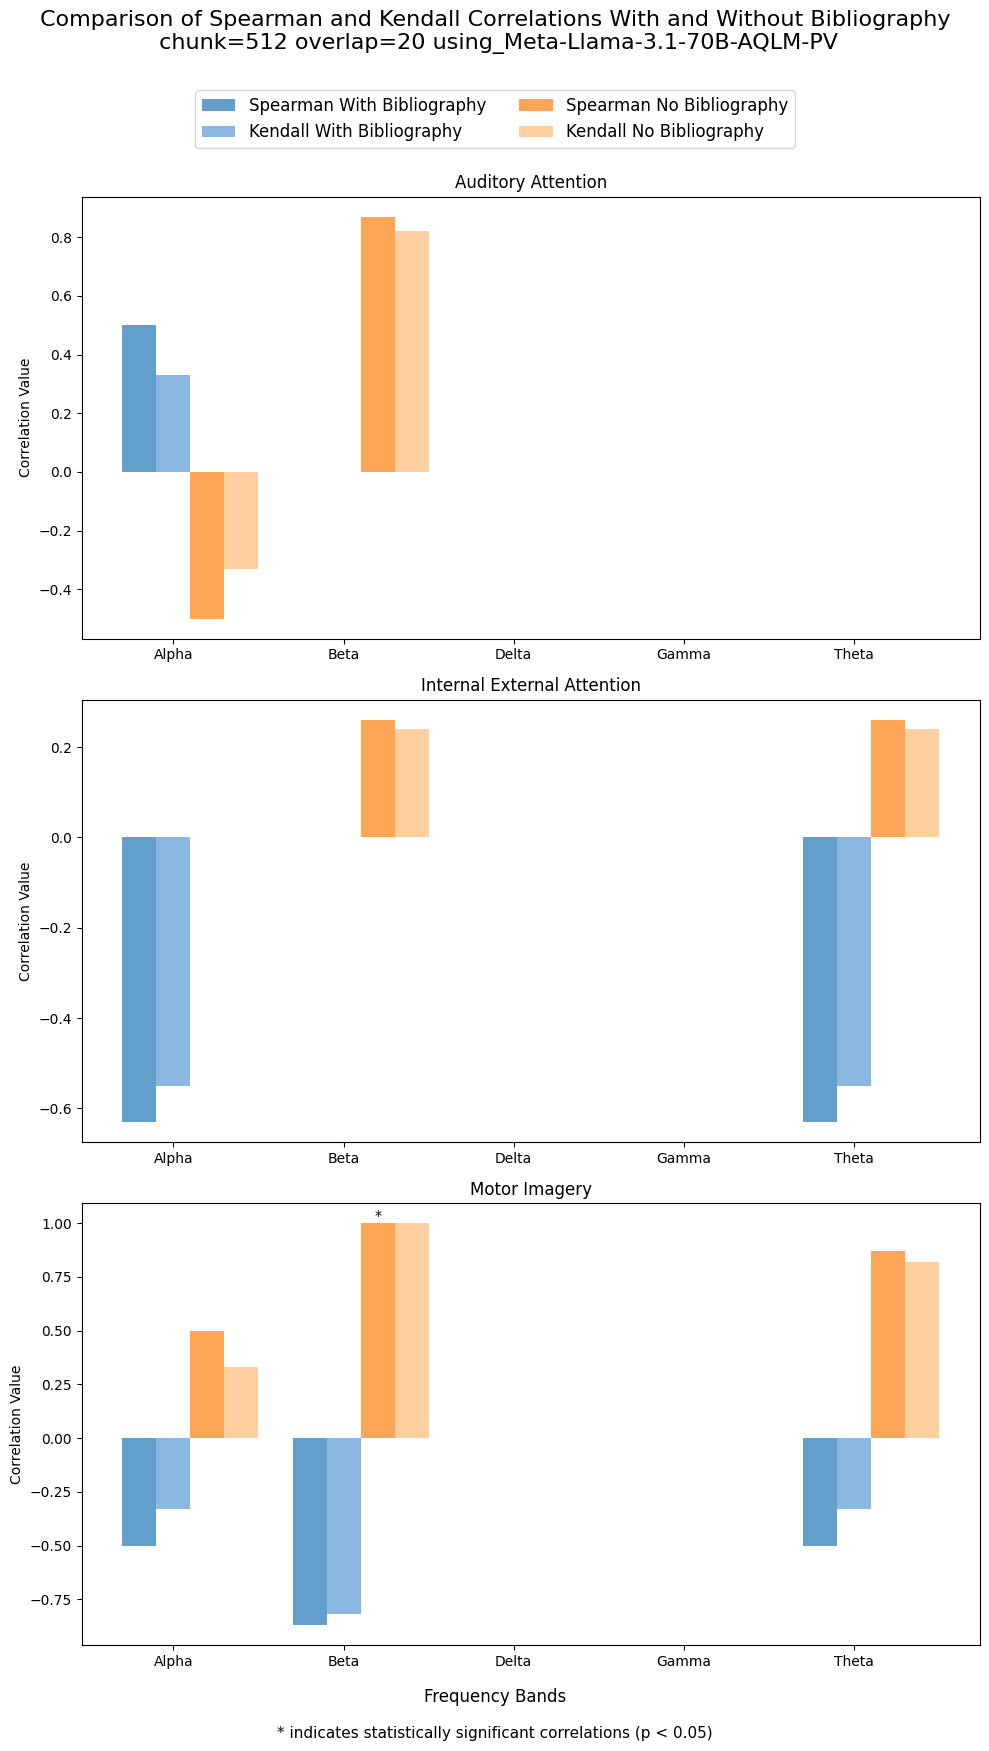

In [3]:
# Topics and metrics
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
metrics = ["Spearman", "Kendall"]
colors = ["#1f77b4", "#5a9bd4"] 
colors_without = ["#ff7f0e", "#ffbb78"]

significance_threshold = 0.05

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Spearman and Kendall Correlations With and Without Bibliography\n chunk=512 overlap=20 using_Meta-Llama-3.1-70B-AQLM-PV", fontsize=16, y=0.98)

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(data_with_references[topic]["Spearman"].keys())
    
    # Correlations data
    spearman_with = [data_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_with = [data_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    spearman_without = [data_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_without = [data_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    
    # P-values data for significance markers
    p_spearman_with = [p_values_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_with = [p_values_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    p_spearman_without = [p_values_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_without = [p_values_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

    x = np.arange(len(freq_bands))
    width = 0.2
    
    # Calculate NaN counts
    nan_count_with = sum(np.isnan(value) for value in spearman_with + kendall_with)
    nan_count_without = sum(np.isnan(value) for value in spearman_without + kendall_without)

    # Plot 'With Bibliography' bars
    bars1 = ax.bar(x - width, spearman_with, width, color=colors[0], alpha=0.7)
    bars2 = ax.bar(x, kendall_with, width, color=colors[1], alpha=0.7)
    
    # Plot 'No Bibliography' bars
    bars3 = ax.bar(x + width, spearman_without, width, color=colors_without[0], alpha=0.7)
    bars4 = ax.bar(x + 2 * width, kendall_without, width, color=colors_without[1], alpha=0.7)
    
    # Annotate statistical significance
    for i, (p_sw, p_kw, p_swo, p_kwo) in enumerate(zip(p_spearman_with, p_kendall_with, p_spearman_without, p_kendall_without)):
        if p_sw < significance_threshold:
            ax.text(x[i] - width, spearman_with[i], '*', ha='center', va='bottom', color='black')
        if p_kw < significance_threshold:
            ax.text(x[i], kendall_with[i], '*', ha='center', va='bottom', color='black')
        if p_swo < significance_threshold:
            ax.text(x[i] + width, spearman_without[i], '*', ha='center', va='bottom', color='black')
        if p_kwo < significance_threshold:
            ax.text(x[i] + 2 * width, kendall_without[i], '*', ha='center', va='bottom', color='black')
    
    # Set title, x-ticks and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")
    
fig.legend(["Spearman With Bibliography", "Kendall With Bibliography", 
            "Spearman No Bibliography", "Kendall No Bibliography"], loc="upper center", fontsize=12, ncol=2, bbox_to_anchor=(0.5, 0.94))

fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)

fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()

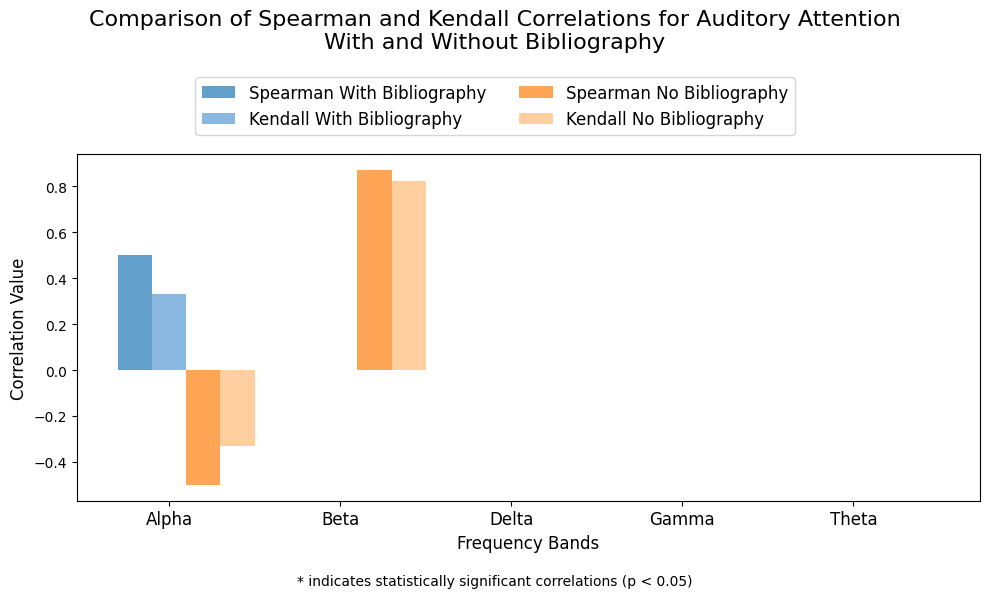

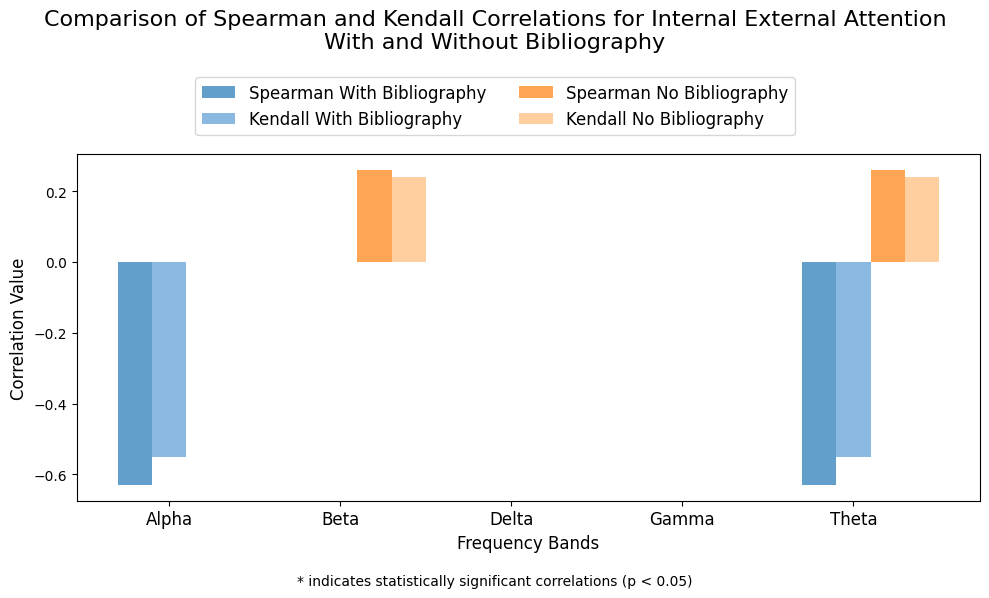

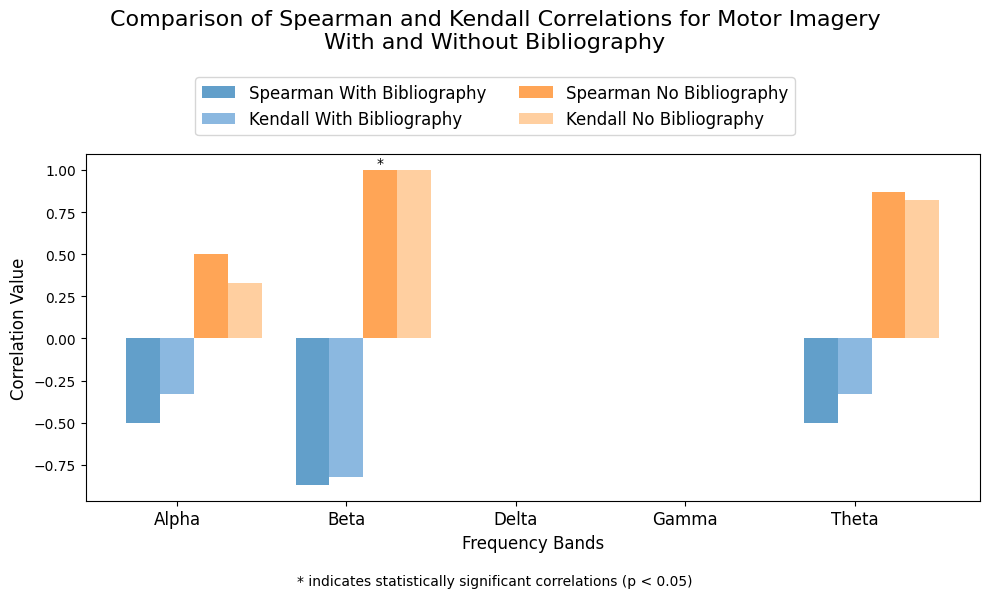

In [10]:
for topic in topics:
    freq_bands = list(data_with_references[topic]["Spearman"].keys())
    
    # Correlations data
    spearman_with = [data_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_with = [data_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    spearman_without = [data_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_without = [data_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    
    # P-values data for significance markers
    p_spearman_with = [p_values_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_with = [p_values_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    p_spearman_without = [p_values_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_without = [p_values_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

    x = np.arange(len(freq_bands))
    width = 0.2

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Comparison of Spearman and Kendall Correlations for {topic}\nWith and Without Bibliography", fontsize=16)

    # Plot 'With Bibliography' bars
    bars1 = ax.bar(x - width, spearman_with, width, color=colors[0], alpha=0.7, label="Spearman With Bibliography")
    bars2 = ax.bar(x, kendall_with, width, color=colors[1], alpha=0.7, label="Kendall With Bibliography")
    
    # Plot 'No Bibliography' bars
    bars3 = ax.bar(x + width, spearman_without, width, color=colors_without[0], alpha=0.7, label="Spearman No Bibliography")
    bars4 = ax.bar(x + 2 * width, kendall_without, width, color=colors_without[1], alpha=0.7, label="Kendall No Bibliography")
    
    # Annotate statistical significance
    for i, (p_sw, p_kw, p_swo, p_kwo) in enumerate(zip(p_spearman_with, p_kendall_with, p_spearman_without, p_kendall_without)):
        if p_sw < significance_threshold:
            ax.text(x[i] - width, spearman_with[i], '*', ha='center', va='bottom', color='black')
        if p_kw < significance_threshold:
            ax.text(x[i], kendall_with[i], '*', ha='center', va='bottom', color='black')
        if p_swo < significance_threshold:
            ax.text(x[i] + width, spearman_without[i], '*', ha='center', va='bottom', color='black')
        if p_kwo < significance_threshold:
            ax.text(x[i] + 2 * width, kendall_without[i], '*', ha='center', va='bottom', color='black')
    
    # Set labels and x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=12)
    ax.set_ylabel("Correlation Value", fontsize=12)
    ax.set_xlabel("Frequency Bands", fontsize=12)

    # Add legend below the title
    fig.legend(["Spearman With Bibliography", "Kendall With Bibliography", 
                "Spearman No Bibliography", "Kendall No Bibliography"], 
               loc="upper center", fontsize=12, ncol=2, bbox_to_anchor=(0.5, 0.88))
    
    # Add significance note
    fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=10)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86])
    plt.show()


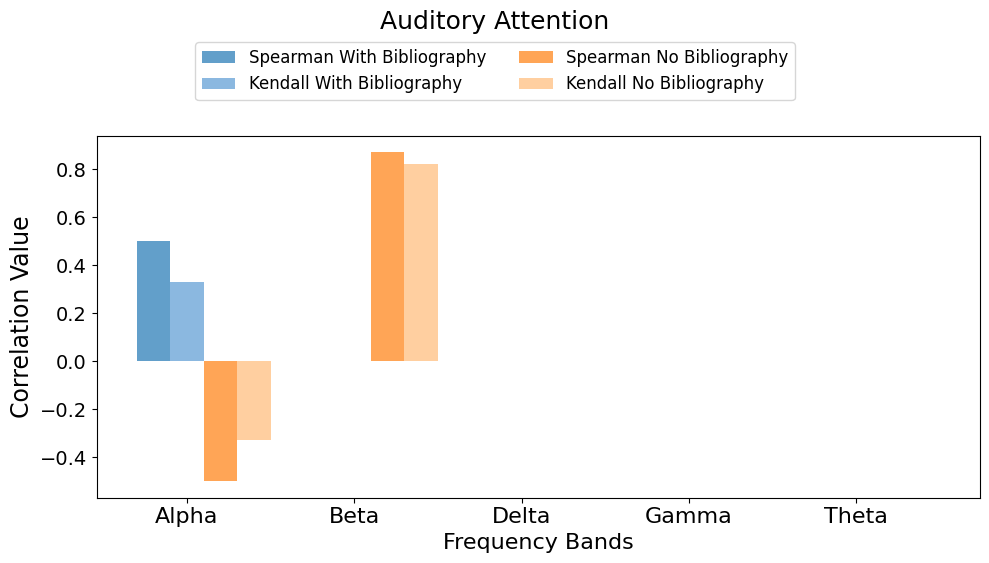

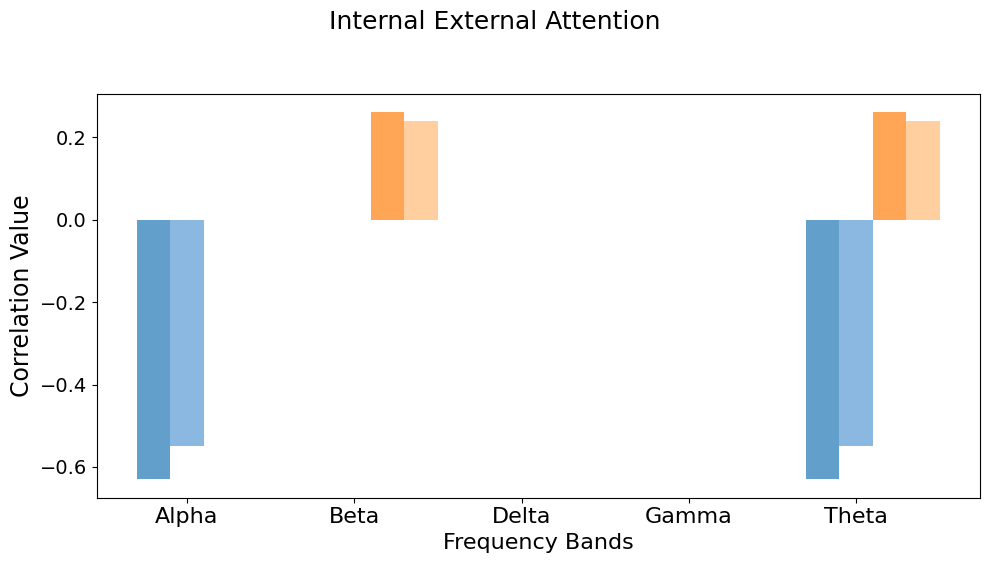

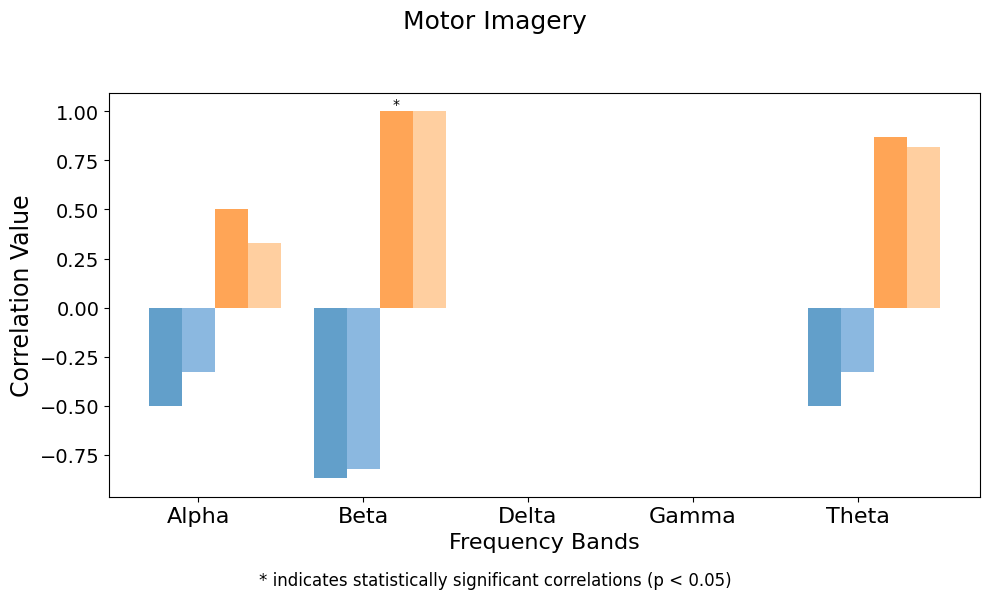

In [59]:
for idx, topic in enumerate(topics):
    freq_bands = list(data_with_references[topic]["Spearman"].keys())
    
    # Correlations data
    spearman_with = [data_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_with = [data_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    spearman_without = [data_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    kendall_without = [data_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    
    # P-values data for significance markers
    p_spearman_with = [p_values_with_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_with = [p_values_with_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
    p_spearman_without = [p_values_no_references[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
    p_kendall_without = [p_values_no_references[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

    x = np.arange(len(freq_bands))
    width = 0.2

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    # Plot 'With Bibliography' bars
    bars1 = ax.bar(x - width, spearman_with, width, color=colors[0], alpha=0.7, label="Spearman With Bibliography")
    bars2 = ax.bar(x, kendall_with, width, color=colors[1], alpha=0.7, label="Kendall With Bibliography")
    
    # Plot 'No Bibliography' bars
    bars3 = ax.bar(x + width, spearman_without, width, color=colors_without[0], alpha=0.7, label="Spearman No Bibliography")
    bars4 = ax.bar(x + 2 * width, kendall_without, width, color=colors_without[1], alpha=0.7, label="Kendall No Bibliography")
    
    # Annotate statistical significance
    for i, (p_sw, p_kw, p_swo, p_kwo) in enumerate(zip(p_spearman_with, p_kendall_with, p_spearman_without, p_kendall_without)):
        if p_sw < significance_threshold:
            ax.text(x[i] - width, spearman_with[i], '*', ha='center', va='bottom', color='black')
        if p_kw < significance_threshold:
            ax.text(x[i], kendall_with[i], '*', ha='center', va='bottom', color='black')
        if p_swo < significance_threshold:
            ax.text(x[i] + width, spearman_without[i], '*', ha='center', va='bottom', color='black')
        if p_kwo < significance_threshold:
            ax.text(x[i] + 2 * width, kendall_without[i], '*', ha='center', va='bottom', color='black')
    
    # Set labels and x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)

    ax.tick_params(axis='y', labelsize=14)

    # Add legend above the title only for the first plot
    if idx == 0:
        fig.legend(["Spearman With Bibliography", "Kendall With Bibliography", 
                    "Spearman No Bibliography", "Kendall No Bibliography"], 
                   loc="upper center", fontsize=12, ncol=2, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only after the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


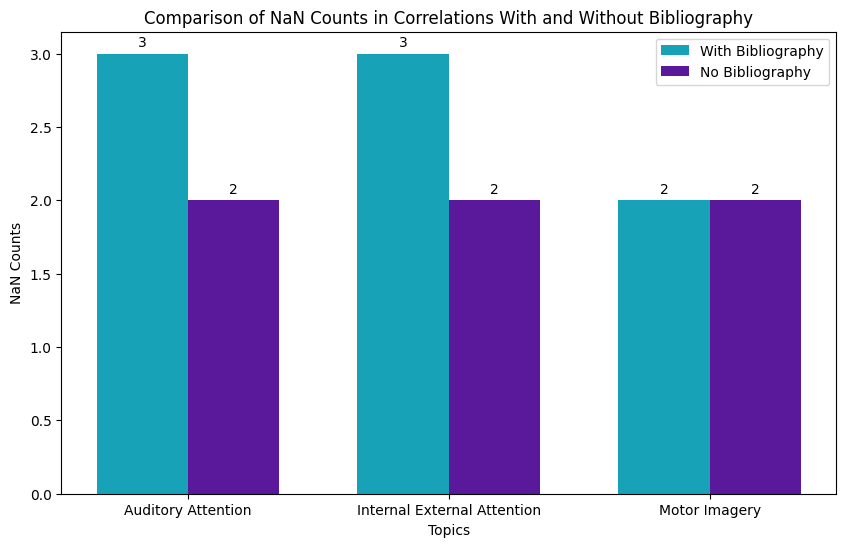

In [121]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "With Bibliography": sum(np.isnan(data_with_references[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in data_with_references[topic][metric]),
        "No Bibliography": sum(np.isnan(data_no_references[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in data_no_references[topic][metric])
    }
    for topic in topics
}

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_with = [nan_counts[topic]["With Bibliography"] for topic in topics_list]
nan_without = [nan_counts[topic]["No Bibliography"] for topic in topics_list]

# Set up the bar chart
x = np.arange(len(topics_list))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_with = ax.bar(x - width / 2, nan_with, width, label="With Bibliography", color="#17a2b8")
bars_without = ax.bar(x + width / 2, nan_without, width, label="No Bibliography", color="#5a189a")

# Add labels and title
ax.set_xlabel("Topics")
ax.set_ylabel("NaN Counts")
ax.set_title("Comparison of NaN Counts in Correlations With and Without Bibliography")
ax.set_xticks(x)
ax.set_xticklabels(topics_list)
ax.legend()

# Annotate NaN counts on each bar
for bar in bars_with + bars_without:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',  # Label text
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                xytext=(0, 3),  # Offset from the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [11]:
correlations_chunk_256_overlap_20 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.87, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": -0.82, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.32, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.77},
        "Kendall":  {"Alpha": -0.18, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.71}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": -0.5, "Beta": -0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": -0.33, "Beta": -0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    }
}
p_values_chunk_256_overlap_20 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.33, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": 0.22, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.68, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.23},
        "Kendall":  {"Alpha": 0.72, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.18}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33}
    }
}

correlations_chunk_512_overlap_20 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": -0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": 0.26, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall":  {"Alpha": 0.0, "Beta": 0.24, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.33, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_values_chunk_512_overlap_20 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": 0.74, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.65, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

correlations_1024_overlap_128 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan},
        "Kendall":  {"Alpha": 0.0, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.4, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.63},
        "Kendall":  {"Alpha": -0.33, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.55}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.87, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.82, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_values_1024_overlap_128 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan},
        "Kendall":  {"Alpha": 1.0, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.6, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.37},
        "Kendall":  {"Alpha": 0.75, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.28}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.33, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 0.22, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

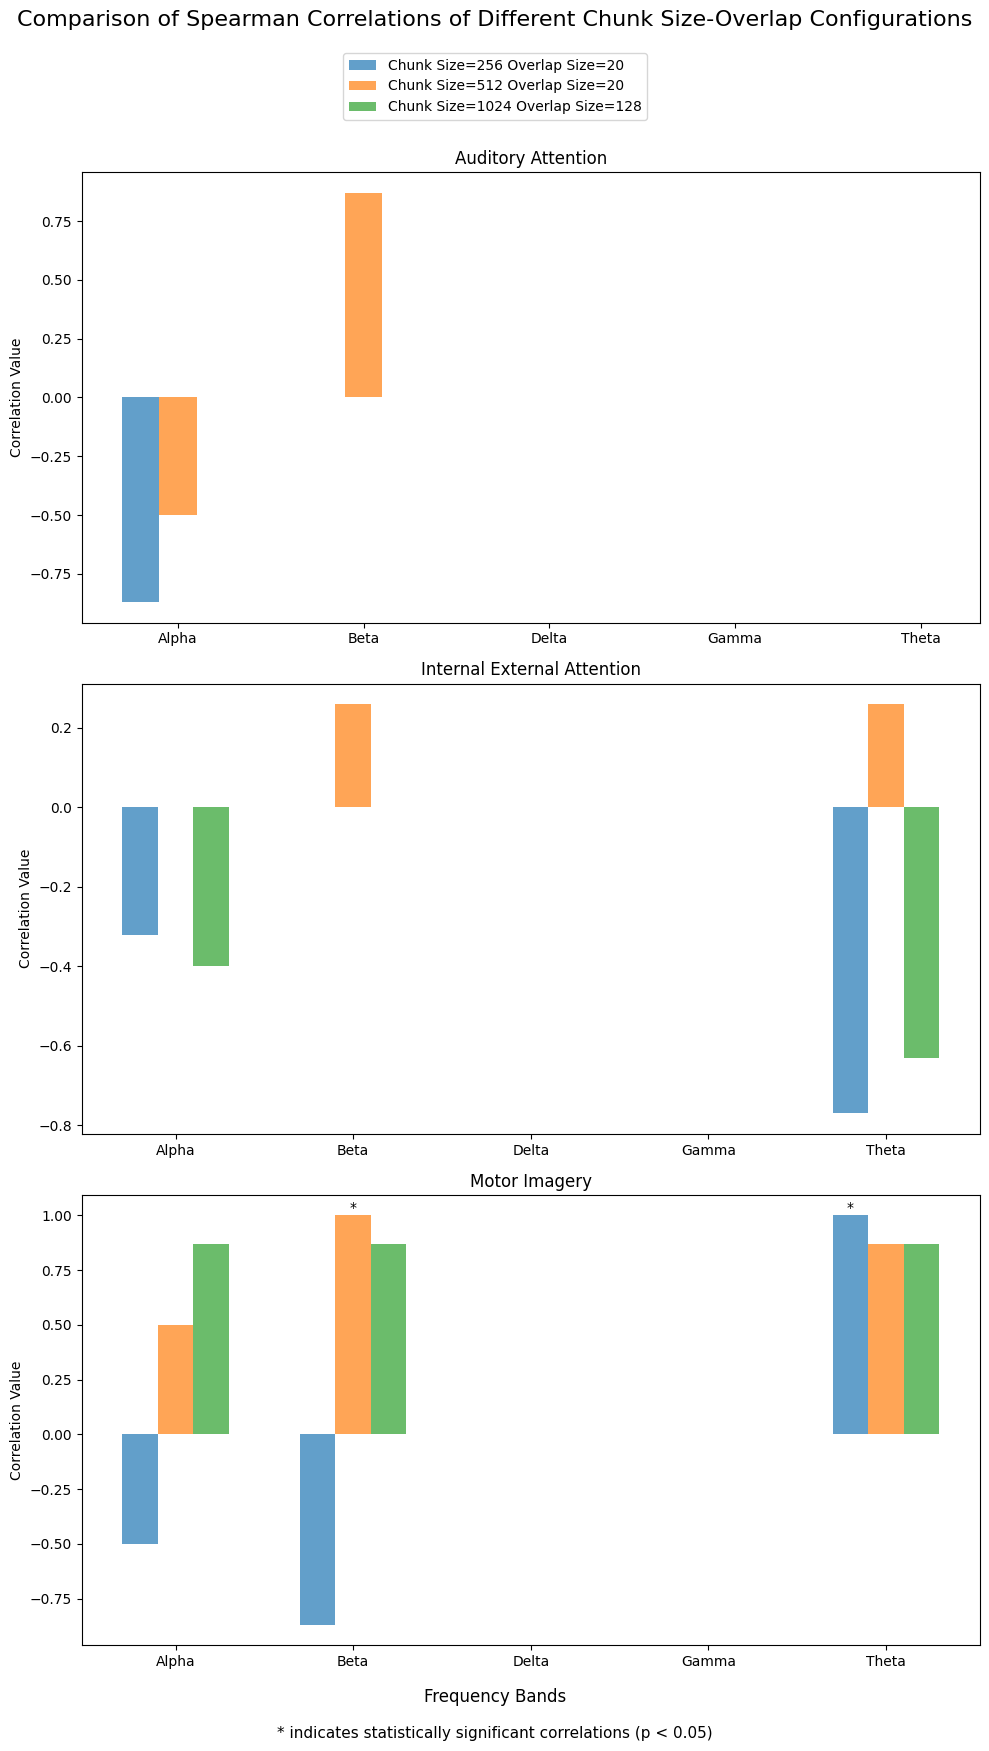

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the three configurations
correlations = {
    "chunk_256_overlap_20": correlations_chunk_256_overlap_20,
    "chunk_512_overlap_20": correlations_chunk_512_overlap_20,
    "chunk_1024_overlap_128": correlations_1024_overlap_128
}

p_values = {
    "chunk_256_overlap_20": p_values_chunk_256_overlap_20,
    "chunk_512_overlap_20": p_values_chunk_512_overlap_20,
    "chunk_1024_overlap_128": p_values_1024_overlap_128
}

# Configuration and color setup
configurations = ["chunk_256_overlap_20", "chunk_512_overlap_20", "chunk_1024_overlap_128"]
config_labels = ["Chunk Size=256 Overlap Size=20", "Chunk Size=512 Overlap Size=20", "Chunk Size=1024 Overlap Size=128"]
config_colors = {
    "chunk_256_overlap_20": "#1f77b4",  # Blue
    "chunk_512_overlap_20": "#ff7f0e",  # Orange
    "chunk_1024_overlap_128": "#2ca02c"  # Green
}
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Spearman Correlations of Different Chunk Size-Overlap Configurations", fontsize=16, y=0.98)

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(correlations["chunk_256_overlap_20"][topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Plot each configuration as a set of bars for Spearman correlations only
    for i, config in enumerate(configurations):
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]

        # Plot Spearman bars
        bars_spearman = ax.bar(x - width + i * width, spearman_vals, width,
                               color=config_colors[config], alpha=0.7, label=f"Spearman {config_labels[i]}")

        # Add significance markers
        for j, p_spearman in enumerate(p_spearman_vals):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Legend
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


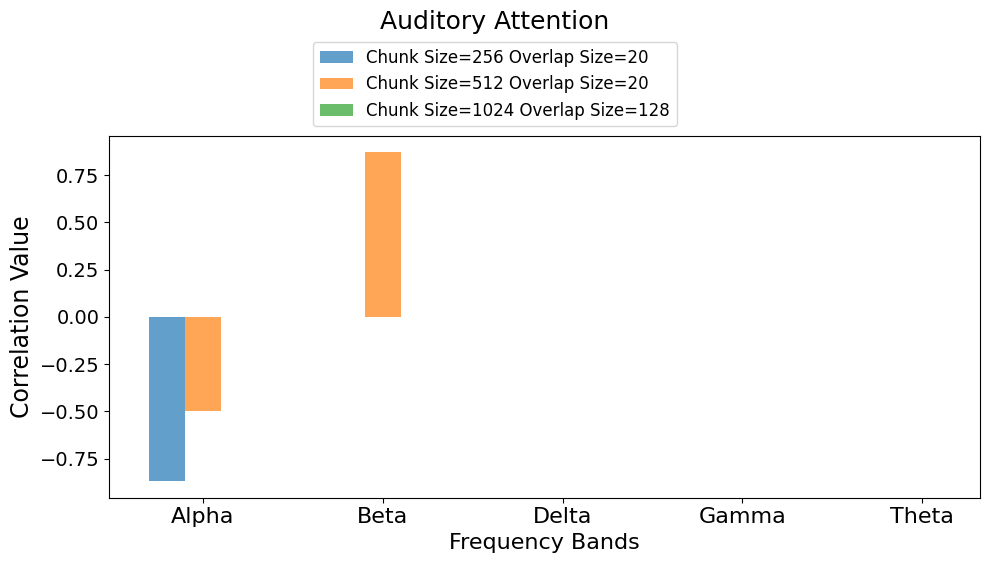

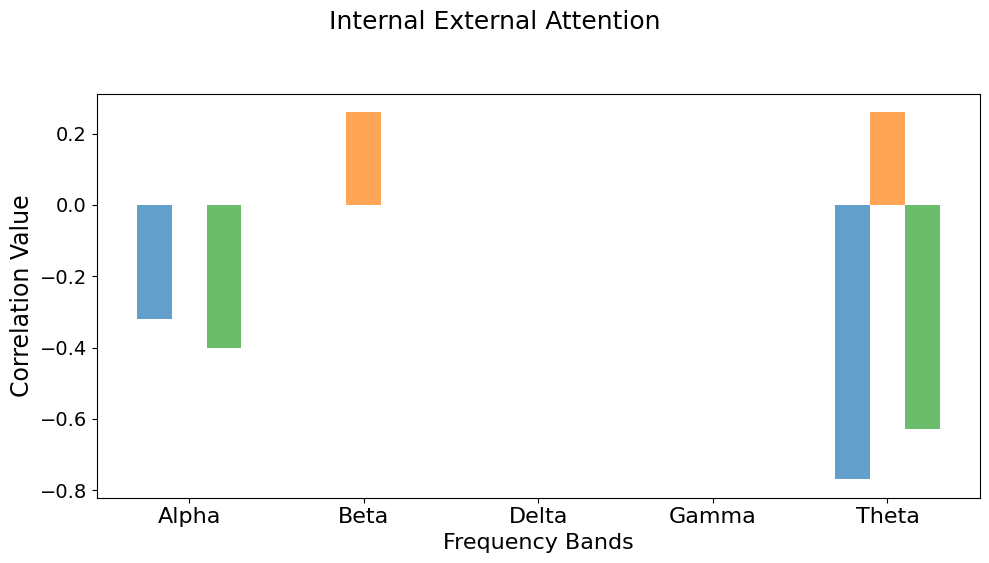

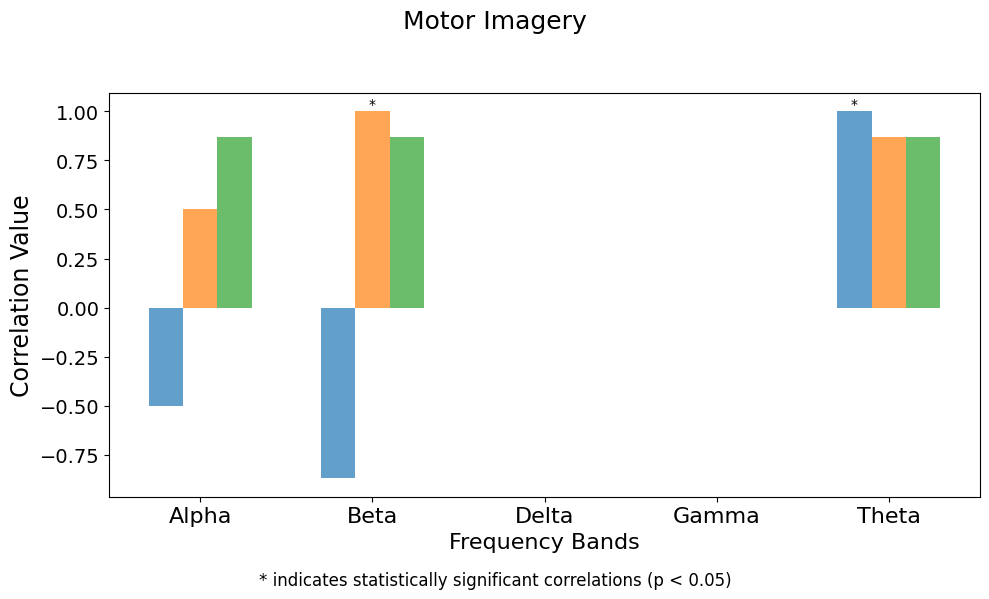

In [57]:
for idx, topic in enumerate(topics):
    freq_bands = list(correlations["chunk_256_overlap_20"][topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    # Plot each configuration as a set of bars for Spearman correlations only
    for i, config in enumerate(configurations):
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]

        # Plot Spearman bars
        bars_spearman = ax.bar(x - width + i * width, spearman_vals, width,
                               color=config_colors[config], alpha=0.7, label=config_labels[i])

        # Add significance markers
        for j, p_spearman in enumerate(p_spearman_vals):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)

    ax.tick_params(axis='y', labelsize=14)
    
    # Add legend above title only for the first plot
    if idx == 0:
        fig.legend([f"{label}" for label in config_labels],
                   loc="upper center", fontsize=12, ncol=1, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only after the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


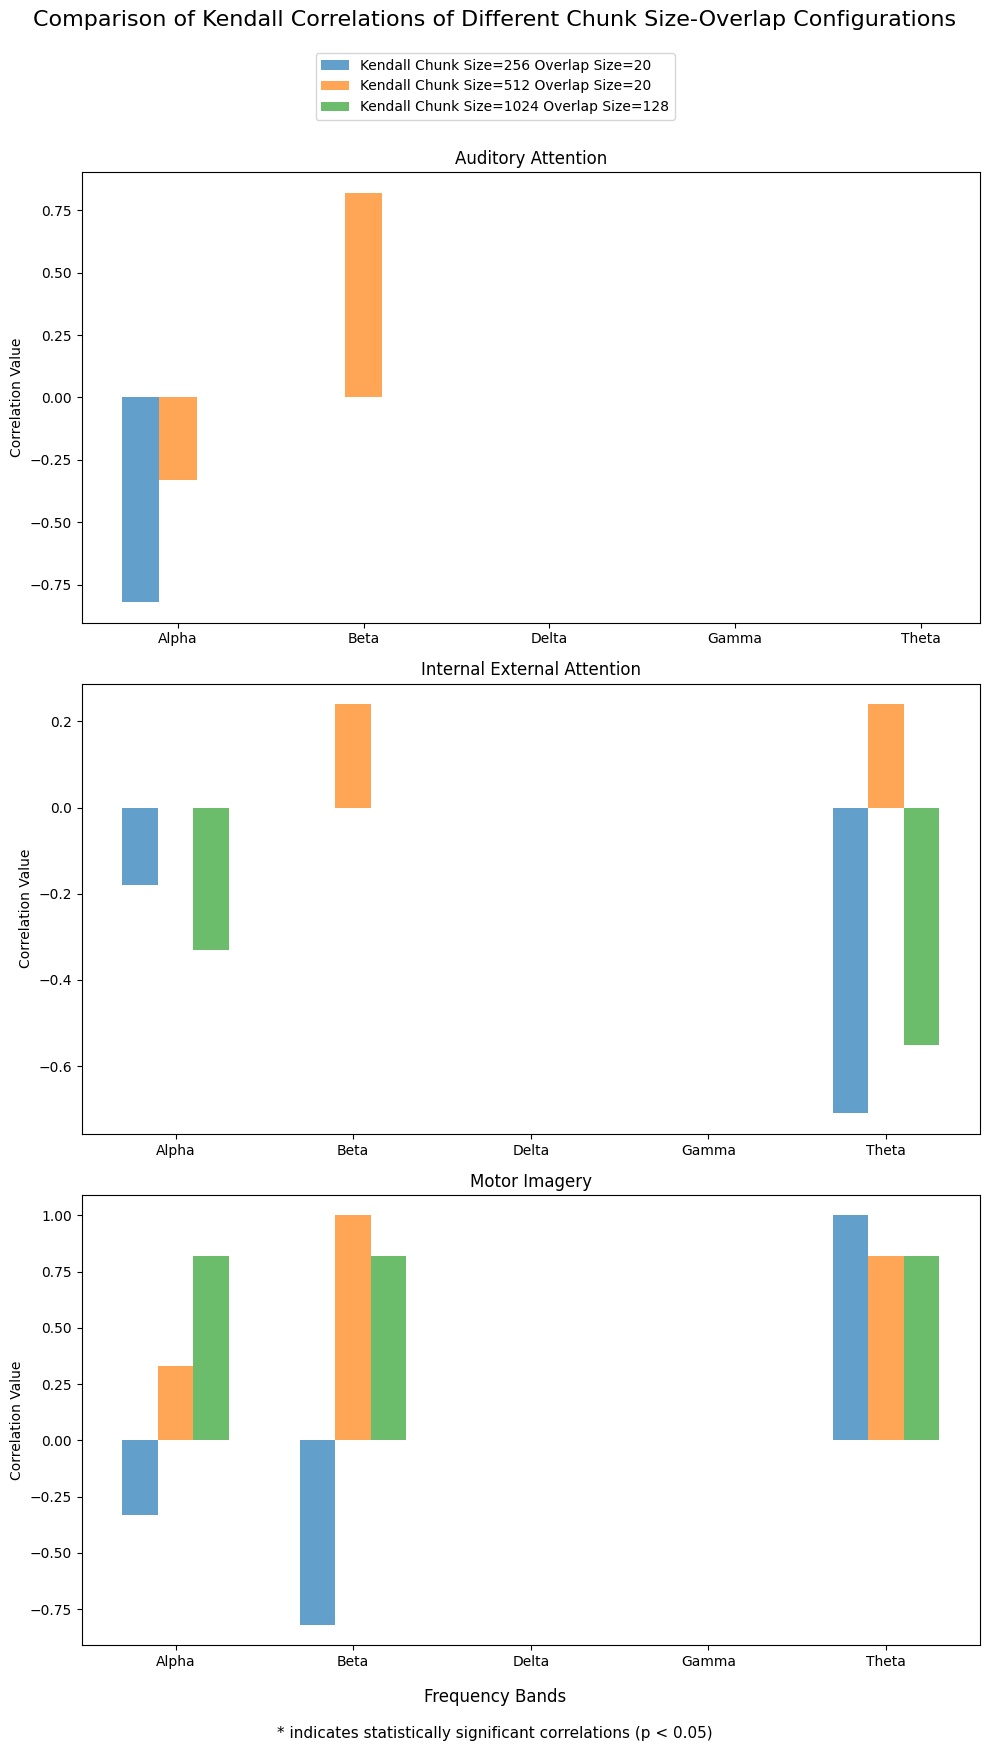

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the three configurations
correlations = {
    "chunk_256_overlap_20": correlations_chunk_256_overlap_20,
    "chunk_512_overlap_20": correlations_chunk_512_overlap_20,
    "chunk_1024_overlap_128": correlations_1024_overlap_128
}

p_values = {
    "chunk_256_overlap_20": p_values_chunk_256_overlap_20,
    "chunk_512_overlap_20": p_values_chunk_512_overlap_20,
    "chunk_1024_overlap_128": p_values_1024_overlap_128
}

# Configuration and color setup
configurations = ["chunk_256_overlap_20", "chunk_512_overlap_20", "chunk_1024_overlap_128"]
config_labels = ["Chunk Size=256 Overlap Size=20", "Chunk Size=512 Overlap Size=20", "Chunk Size=1024 Overlap Size=128"]
config_colors = {
    "chunk_256_overlap_20": "#1f77b4",  # Blue
    "chunk_512_overlap_20": "#ff7f0e",  # Orange
    "chunk_1024_overlap_128": "#2ca02c"  # Green
}

topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Kendall Correlations of Different Chunk Size-Overlap Configurations", fontsize=16, y=0.98)

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(correlations["chunk_256_overlap_20"][topic]["Kendall"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Plot each configuration as a set of bars for Kendall correlations only
    for i, config in enumerate(configurations):
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot Kendall bars
        bars_kendall = ax.bar(x - width + i * width, kendall_vals, width,
                              color=config_colors[config], alpha=0.7, label=f"Kendall {config_labels[i]}")

        # Add significance markers
        for j, p_kendall in enumerate(p_kendall_vals):
            if p_kendall < significance_threshold:
                ax.text(x[j] - width + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Legend
fig.legend([f"Kendall {label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


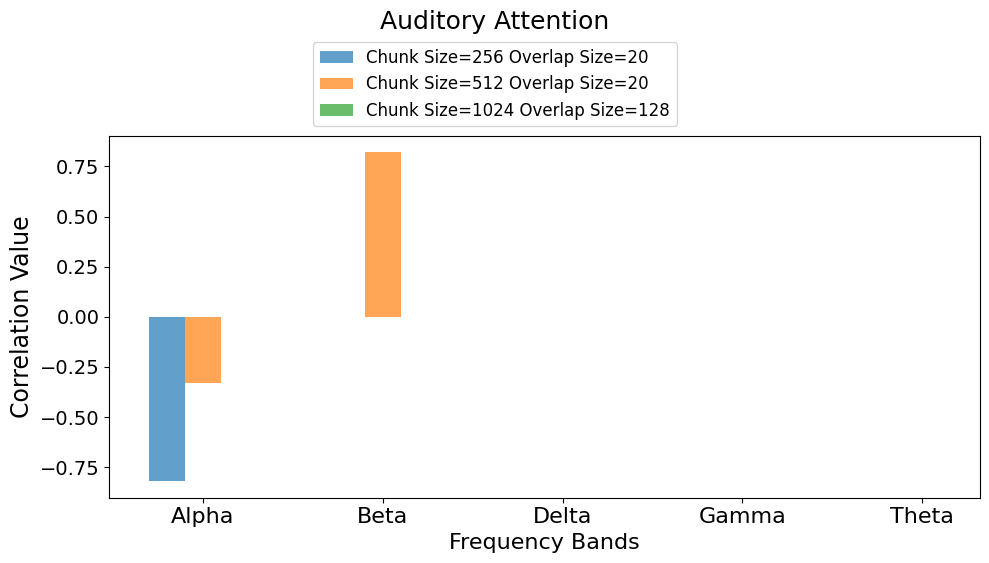

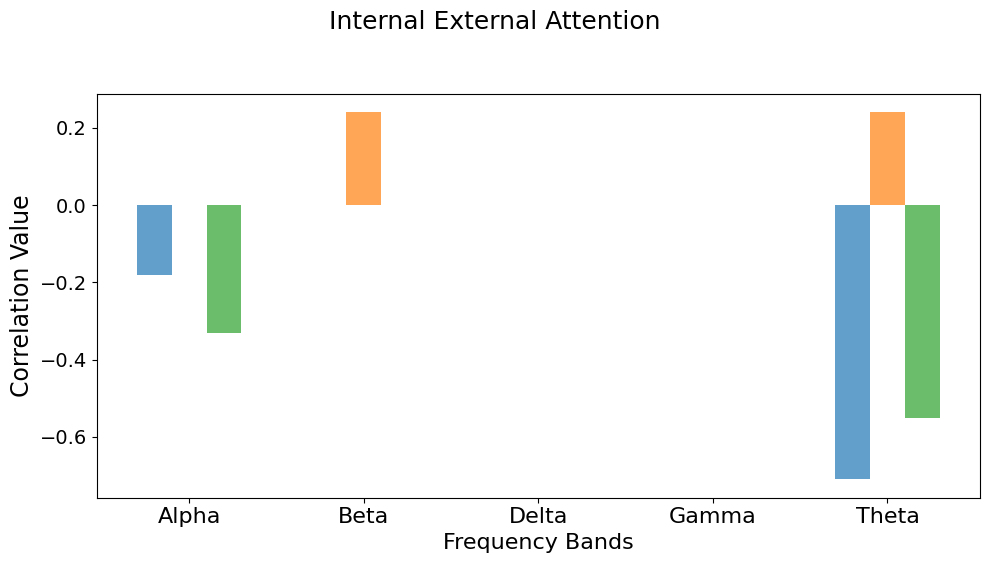

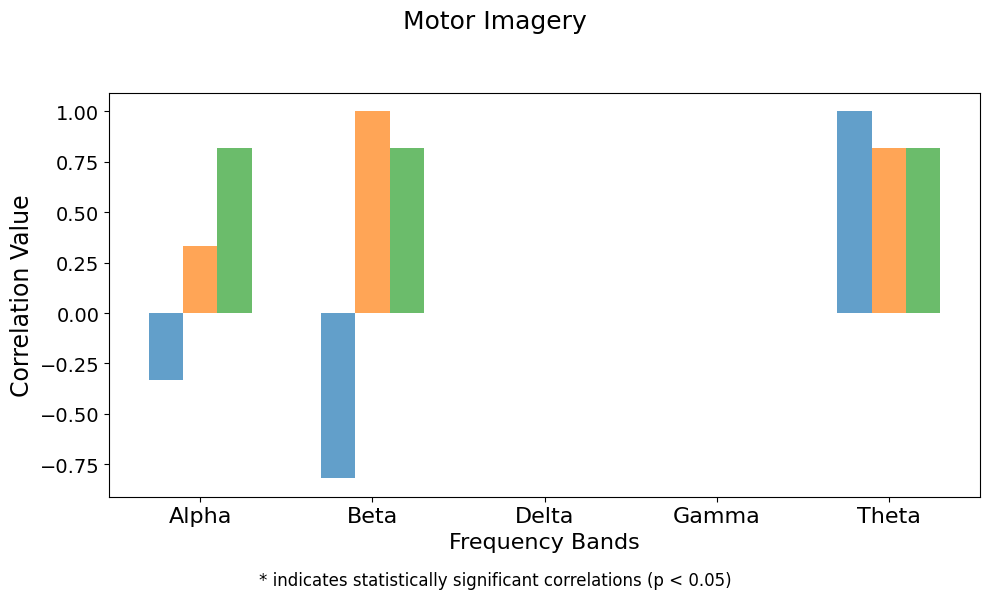

In [58]:
for idx, topic in enumerate(topics):
    freq_bands = list(correlations["chunk_256_overlap_20"][topic]["Kendall"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    # Plot each configuration as a set of bars for Kendall correlations only
    for i, config in enumerate(configurations):
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot Kendall bars
        bars_kendall = ax.bar(x - width + i * width, kendall_vals, width,
                              color=config_colors[config], alpha=0.7, label=config_labels[i])

        # Add significance markers
        for j, p_kendall in enumerate(p_kendall_vals):
            if p_kendall < significance_threshold:
                ax.text(x[j] - width + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)

    ax.tick_params(axis='y', labelsize=14)

    # Add legend above title only for the first plot
    if idx == 0:
        fig.legend([f"{label}" for label in config_labels],
                   loc="upper center", fontsize=12, ncol=1, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only after the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


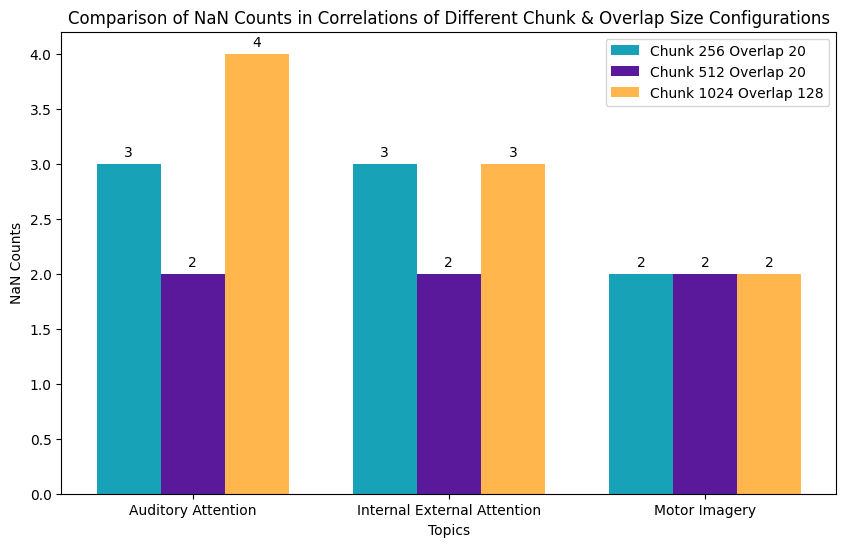

In [15]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "Chunk 256 Overlap 20": sum(np.isnan(correlations_chunk_256_overlap_20[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in correlations_chunk_256_overlap_20[topic][metric]),
        "Chunk 512 Overlap 20": sum(np.isnan(correlations_chunk_512_overlap_20[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in correlations_chunk_512_overlap_20[topic][metric]),
        "Chunk 1024 Overlap 128": sum(np.isnan(correlations_1024_overlap_128[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in correlations_1024_overlap_128[topic][metric])
    }
    for topic in topics
}

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_256_20 = [nan_counts[topic]["Chunk 256 Overlap 20"] for topic in topics_list]
nan_512_20 = [nan_counts[topic]["Chunk 512 Overlap 20"] for topic in topics_list]
nan_1024_128 = [nan_counts[topic]["Chunk 1024 Overlap 128"] for topic in topics_list]

# Set up positions for each bar group
x = np.arange(len(topics_list))
width = 0.25  # Reduced width for each bar to fit them all without overlap

fig, ax = plt.subplots(figsize=(10, 6))

# Corrected positions for each set of bars
bars_256_20 = ax.bar(x - width, nan_256_20, width, label="Chunk 256 Overlap 20", color="#17a2b8")
bars_512_20 = ax.bar(x, nan_512_20, width, label="Chunk 512 Overlap 20", color="#5a189a")
bars_1024_128 = ax.bar(x + width, nan_1024_128, width, label="Chunk 1024 Overlap 128", color="#ffb74d")

# Add labels and title
ax.set_xlabel("Topics")
ax.set_ylabel("NaN Counts")
ax.set_title("Comparison of NaN Counts in Correlations of Different Chunk & Overlap Size Configurations")
ax.set_xticks(x)
ax.set_xticklabels(topics_list)
ax.legend()

# Annotate NaN counts on each bar
for bars in [bars_256_20, bars_512_20, bars_1024_128]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                    xytext=(0, 3),  # Offset from the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [27]:
low_penalty_spearman = {'AA': {'Alpha': {'p_value': np.nan, 'rho': np.nan},
        'Beta': {'p_value': np.nan, 'rho': np.nan},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.6666666666666667, 'rho': -0.5}},
 'IEA': {'Alpha': {'p_value': 0.6, 'rho': -0.39999999999999997},
         'Beta': {'p_value': np.nan, 'rho': np.nan},
         'Delta': {'p_value': np.nan, 'rho': np.nan},
         'Gamma': {'p_value': np.nan, 'rho': np.nan},
         'Theta': {'p_value': 0.7891814893221081, 'rho': -0.21081851067789195}},
 'MI': {'Alpha': {'p_value': 0.6666666666666667, 'rho': 0.5},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': np.nan, 'rho': np.nan}}}
        
low_penalty_kendall = {'AA': {'Alpha': {'p_value': np.nan, 'tau': np.nan},
        'Beta': {'p_value': np.nan, 'tau': np.nan},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': -0.33333333333333337}},
 'IEA': {'Alpha': {'p_value': 0.75, 'tau': -0.3333333333333334},
         'Beta': {'p_value': np.nan, 'tau': np.nan},
         'Delta': {'p_value': np.nan, 'tau': np.nan},
         'Gamma': {'p_value': np.nan, 'tau': np.nan},
         'Theta': {'p_value': 0.7179816667337766, 'tau': -0.18257418583505539}},
 'MI': {'Alpha': {'p_value': 1.0, 'tau': 0.33333333333333337},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': np.nan, 'tau': np.nan}}}

In [28]:
# Initialize the target dictionaries
cor_rep_penalty_low = {}
p_rep_penalty_low = {}

category_mapping = {
    'AA': 'Auditory Attention',
    'IEA': 'Internal External Attention',
    'MI': 'Motor Imagery'
}

# Iterate through each category and metric to populate the target dictionaries
for category_key, full_name in category_mapping.items():
    cor_rep_penalty_low[full_name] = {"Spearman": {}, "Kendall": {}}
    p_rep_penalty_low[full_name] = {"Spearman": {}, "Kendall": {}}
    
    # Process Spearman's results
    for metric, data in low_penalty_spearman[category_key].items():
        rho = data.get('rho', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round rho if it's a valid number
        if isinstance(rho, float) and not np.isnan(rho):
            rho_rounded = round(rho, 2)
        else:
            rho_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_rep_penalty_low[full_name]["Spearman"][metric] = rho_rounded
        p_rep_penalty_low[full_name]["Spearman"][metric] = p_val_rounded
    
    # Process Kendall's results
    for metric, data in low_penalty_kendall[category_key].items():
        tau = data.get('tau', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round tau if it's a valid number
        if isinstance(tau, float) and not np.isnan(tau):
            tau_rounded = round(tau, 2)
        else:
            tau_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_rep_penalty_low[full_name]["Kendall"][metric] = tau_rounded
        p_rep_penalty_low[full_name]["Kendall"][metric] = p_val_rounded

# Example usage: Print the resulting dictionaries
print("Correlation Results LLM:")
print(cor_rep_penalty_low)
print("\nP-Value Results LLM:")
print(cor_rep_penalty_low)

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': nan, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.5}, 'Kendall': {'Alpha': nan, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.4, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.21}, 'Kendall': {'Alpha': -0.33, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.18}}, 'Motor Imagery': {'Spearman': {'Alpha': 0.5, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': nan}, 'Kendall': {'Alpha': 0.33, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': nan}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': nan, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.5}, 'Kendall': {'Alpha': nan, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.4, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.21}, 'Kendall': {'Alpha': -0.33, 'Beta': nan, 'Delta': nan, 'G

In [18]:
'''cor_rep_penalty_low = {
    "Auditory Attention": {
        "Spearman": {"Alpha": np.nan, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan},
        "Kendall":  {"Alpha": np.nan, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.77, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall":  {"Alpha": -0.71, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": -0.5, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.33, "Beta": -0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_rep_penalty_low = {
    "Auditory Attention": {
        "Spearman": {"Alpha": np.nan, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan},
        "Kendall":  {"Alpha": np.nan, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": np.nan}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.23, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall":  {"Alpha": 0.18, "Beta": np.nan, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.67, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 1.0, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}'''

cor_rep_penalty_high = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": -0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": 0.26, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall":  {"Alpha": 0.0, "Beta": 0.24, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.33, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_rep_penalty_high = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": 0.74, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.65, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

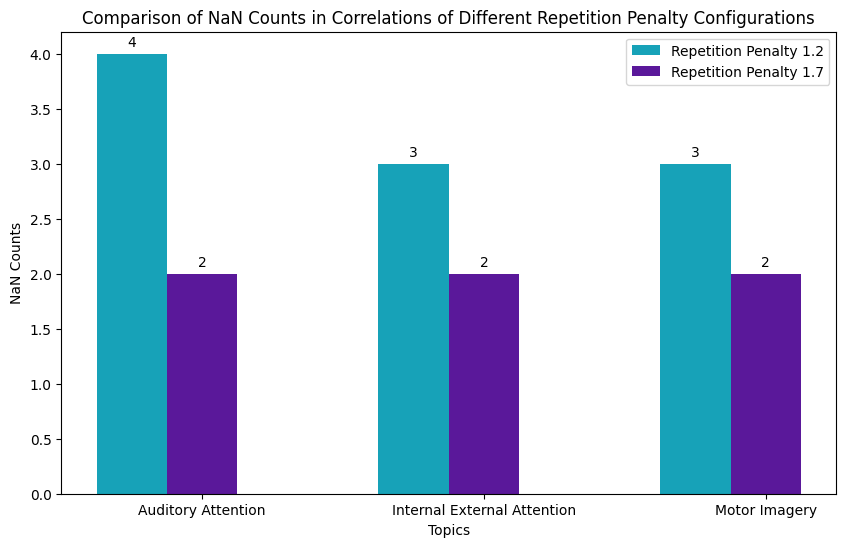

In [19]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "Rep Penalty Low": sum(np.isnan(cor_rep_penalty_low[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in cor_rep_penalty_low[topic][metric]),
        "Rep Penalty High": sum(np.isnan(cor_rep_penalty_high[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_rep_penalty_high[topic][metric])
    }
    for topic in topics
}

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_rep_low = [nan_counts[topic]["Rep Penalty Low"] for topic in topics_list]
nan_rep_high = [nan_counts[topic]["Rep Penalty High"] for topic in topics_list]

# Set up positions for each bar group
x = np.arange(len(topics_list))
width = 0.25  # Reduced width for each bar to fit them all without overlap

fig, ax = plt.subplots(figsize=(10, 6))

# Corrected positions for each set of bars
bars_rep_low = ax.bar(x - width, nan_rep_low, width, label="Repetition Penalty 1.2", color="#17a2b8")
bars_rep_high = ax.bar(x, nan_rep_high, width, label="Repetition Penalty 1.7", color="#5a189a")

# Add labels and title
ax.set_xlabel("Topics")
ax.set_ylabel("NaN Counts")
ax.set_title("Comparison of NaN Counts in Correlations of Different Repetition Penalty Configurations")
ax.set_xticks(x)
ax.set_xticklabels(topics_list)
ax.legend()

# Annotate NaN counts on each bar
for bars in [bars_rep_low, bars_rep_high]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                    xytext=(0, 3),  # Offset from the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

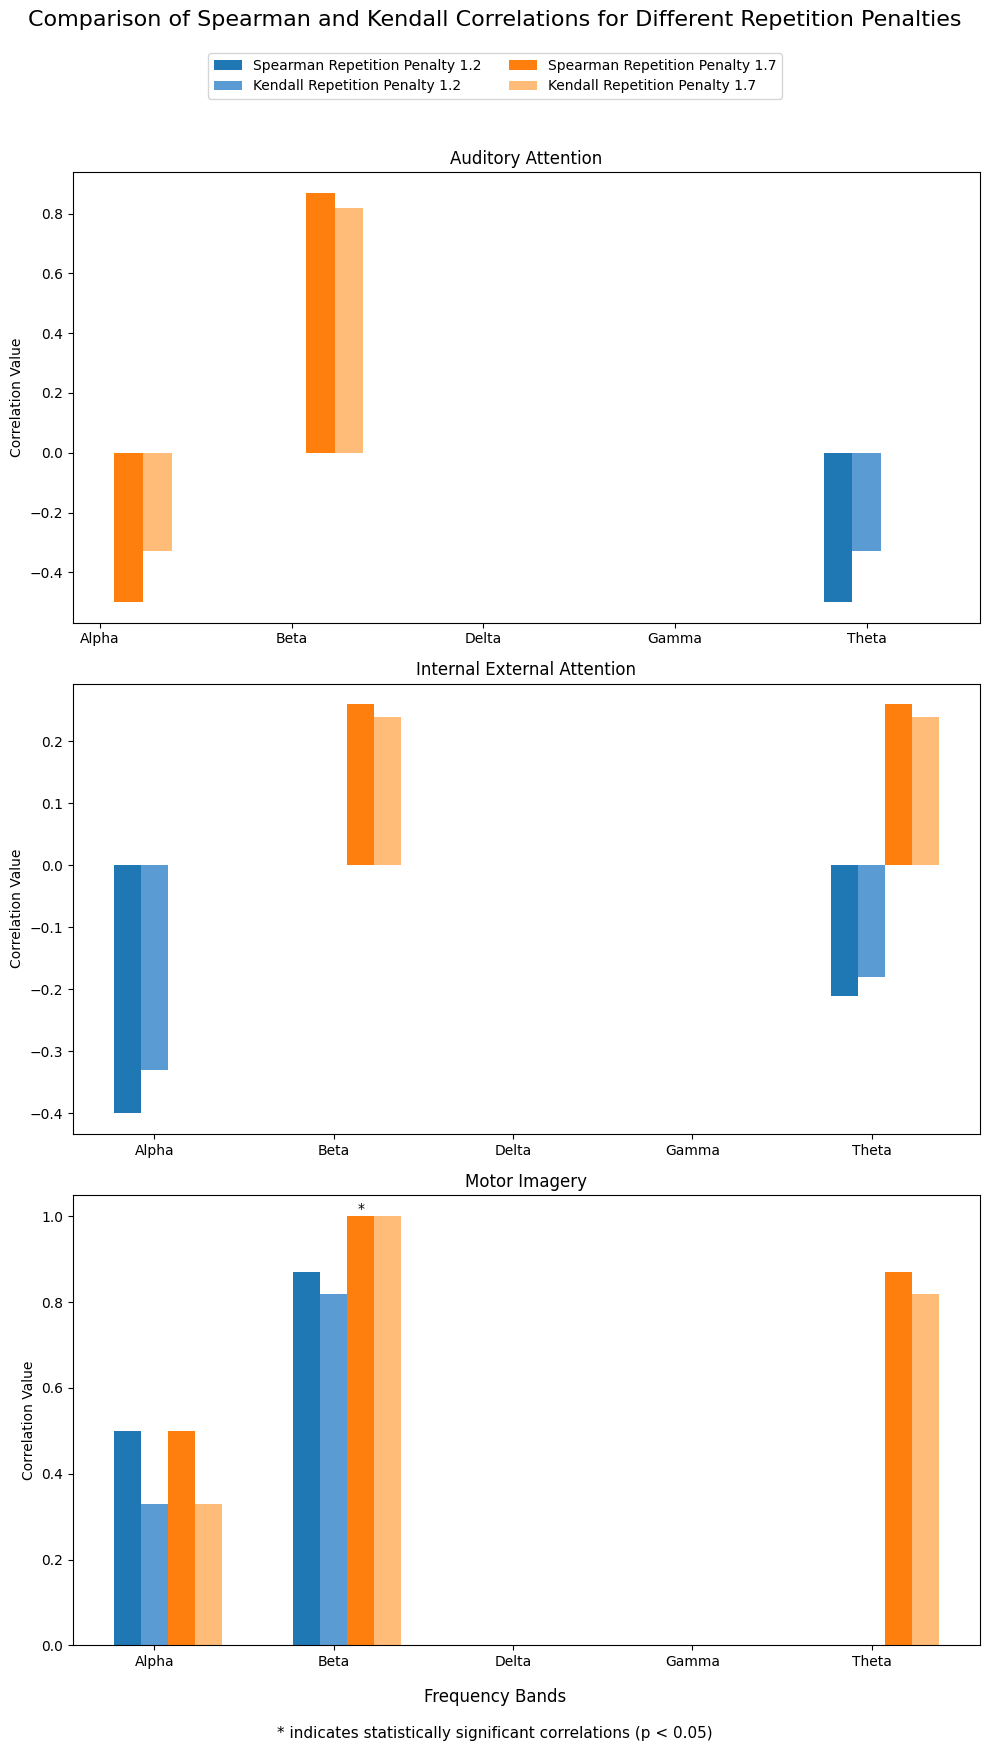

In [60]:
# Define topics and configurations
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
config_labels = ["Rep Penalty Low", "Rep Penalty High"]
config_data = {
    "Rep Penalty Low": (cor_rep_penalty_low, p_rep_penalty_low),
    "Rep Penalty High": (cor_rep_penalty_high, p_rep_penalty_high)
}

# Define colors: Blue for Low Penalty, Orange for High Penalty, with lighter shades for Kendall
config_colors = {
    "Rep Penalty Low": {"Spearman": "#1f77b4", "Kendall": "#5a9bd4"},  # Blue shades
    "Rep Penalty High": {"Spearman": "#ff7f0e", "Kendall": "#ffbb78"}  # Orange shades
}
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Spearman and Kendall Correlations for Different Repetition Penalties", fontsize=16, y=0.98)

# Track bars for legend
legend_handles = []

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(cor_rep_penalty_low[topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))
    width = 0.3

    # Plot each configuration as a set of bars
    for i, (config_label, (correlations, p_values)) in enumerate(config_data.items()):
        spearman_vals = [correlations[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        kendall_vals = [correlations[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot bars for Spearman and Kendall correlations using the same base color with lighter shade for Kendall
        bars_spearman = ax.bar(x - width/2 + i * width, spearman_vals, width/2,
                               color=config_colors[config_label]["Spearman"], label=f"Spearman {config_label}")
        bars_kendall = ax.bar(x + i * width, kendall_vals, width/2,
                              color=config_colors[config_label]["Kendall"], label=f"Kendall {config_label}")

        # Add bars to legend handles for unique legends
        if idx == 0:  # Add to legend only once
            legend_handles.append(bars_spearman)
            legend_handles.append(bars_kendall)

        # Add significance markers
        for j, (p_spearman, p_kendall) in enumerate(zip(p_spearman_vals, p_kendall_vals)):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width/2 + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')
            if p_kendall < significance_threshold:
                ax.text(x[j] + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Create legend
fig.legend(legend_handles, 
           [f"Spearman Repetition Penalty 1.2", "Kendall Repetition Penalty 1.2",
            "Spearman Repetition Penalty 1.7", "Kendall Repetition Penalty 1.7"],
           loc="upper center", fontsize=10, ncol=2, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


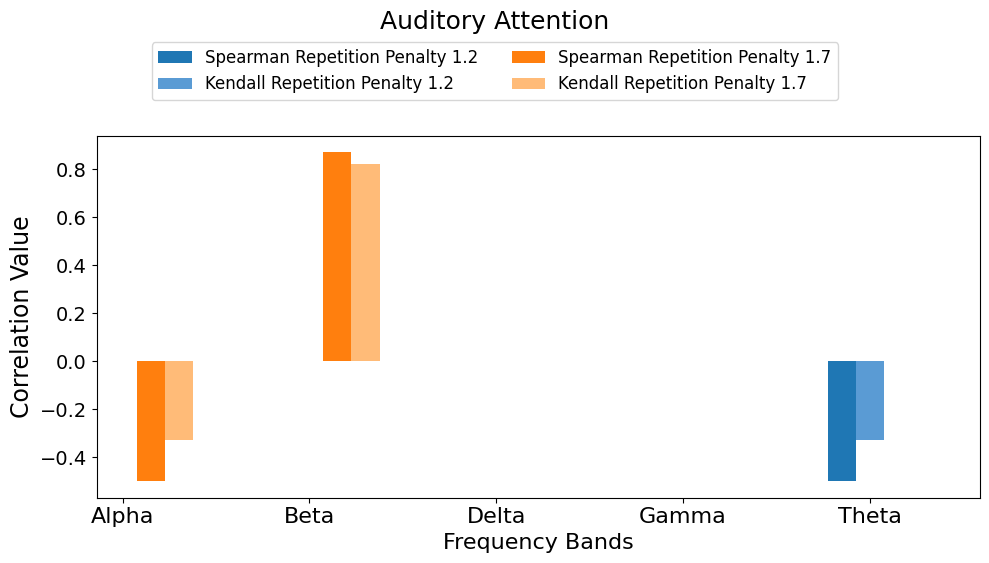

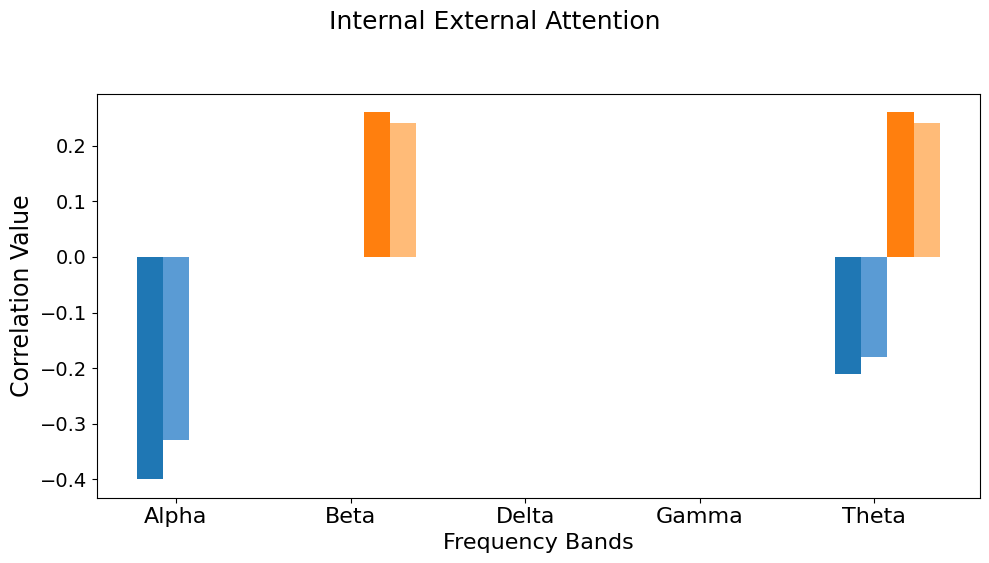

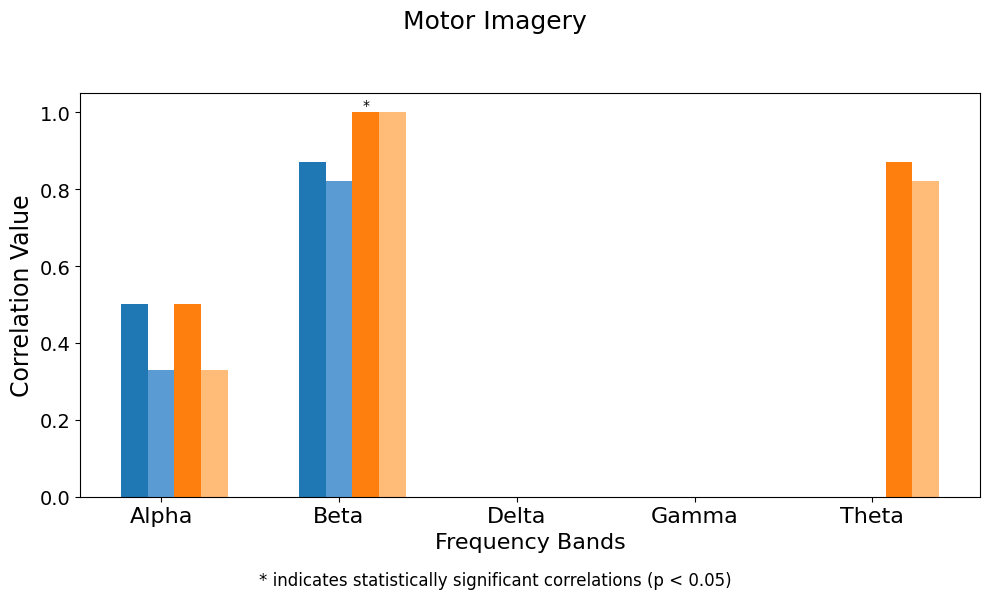

In [62]:
for idx, topic in enumerate(topics):
    freq_bands = list(cor_rep_penalty_low[topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))
    width = 0.3

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    legend_handles = []

    # Plot each configuration as a set of bars
    for i, (config_label, (correlations, p_values)) in enumerate(config_data.items()):
        spearman_vals = [correlations[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        kendall_vals = [correlations[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot bars for Spearman and Kendall correlations
        bars_spearman = ax.bar(x - width/2 + i * width, spearman_vals, width/2,
                               color=config_colors[config_label]["Spearman"], label=f"Spearman {config_label}")
        bars_kendall = ax.bar(x + i * width, kendall_vals, width/2,
                              color=config_colors[config_label]["Kendall"], label=f"Kendall {config_label}")

        # Add bars to legend handles for unique legends
        if idx == 0:  # Add to legend only in the first plot
            legend_handles.append(bars_spearman)
            legend_handles.append(bars_kendall)

        # Add significance markers
        for j, (p_spearman, p_kendall) in enumerate(zip(p_spearman_vals, p_kendall_vals)):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width/2 + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')
            if p_kendall < significance_threshold:
                ax.text(x[j] + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # Add legend only in the first plot
    if idx == 0:
        fig.legend(legend_handles, 
                   [f"Spearman Repetition Penalty 1.2", "Kendall Repetition Penalty 1.2",
            "Spearman Repetition Penalty 1.7", "Kendall Repetition Penalty 1.7"],
                   loc="upper center", fontsize=12, ncol=2, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only in the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


In [63]:
cor_llama3 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.5, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.5},
        "Kendall": {"Alpha": -0.33, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.33}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.63, "Beta": -0.8, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.63 },
        "Kendall": {"Alpha": -0.55, "Beta": -0.67, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.55}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall": {"Alpha": 0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_llama3 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.67, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.67},
        "Kendall": {"Alpha": 1.0, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.37, "Beta": 0.20, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.37},
        "Kendall": {"Alpha": 0.28, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.28}
    },
    "Motor Imagery": {
        "Spearman": { "Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall": {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

cor_llama3_1 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0},
        "Kendall": {"Alpha": -0.33, "Beta": 0.81, "Delta": np.nan, "Gamma": np.nan, "Theta": 0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": -0.8, "Beta": -0.8, "Delta": np.nan, "Gamma": np.nan, "Theta": -1.0},
        "Kendall": {"Alpha": -0.67, "Beta": -0.67, "Delta": np.nan, "Gamma": np.nan, "Theta": -1.0}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": -0.5, "Beta": -0.5, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.5},
        "Kendall": {"Alpha": -0.33, "Beta": -0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": -0.33}
    }
}

p_llama3_1 = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall": {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.20, "Beta": 0.20, "Delta": np.nan, "Gamma": np.nan, "Theta": 0},
        "Kendall": {"Alpha": 0.33, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.08}
    },
    "Motor Imagery": {
        "Spearman": { "Alpha": 0.67, "Beta": 0.67, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.67},
        "Kendall": {"Alpha": 1.0, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    }
}

cor_llama_AQLM = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": -0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": 0.26, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall":  {"Alpha": 0.0, "Beta": 0.24, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.33, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_llama_AQLM = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": 0.74, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.65, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}



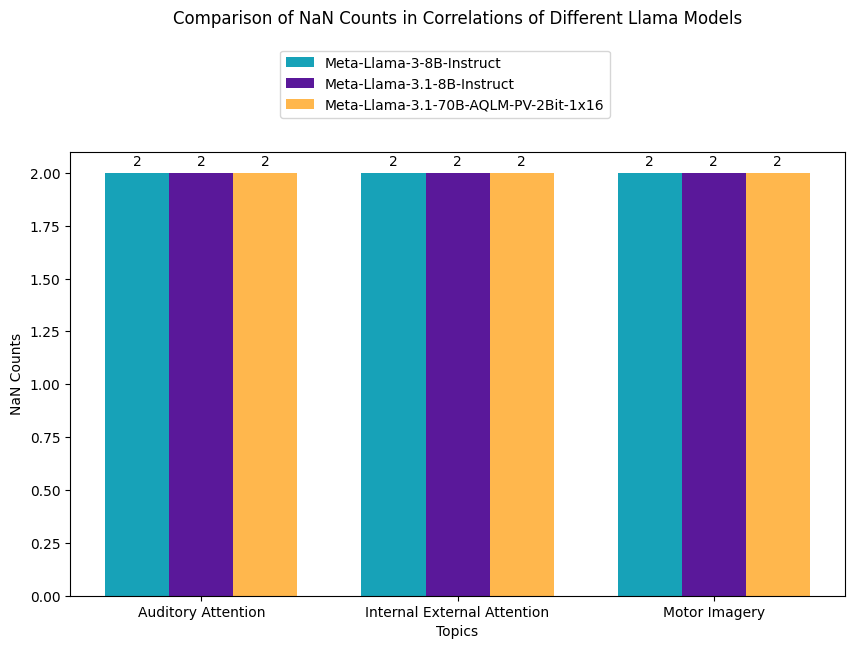

In [64]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "llama3": sum(np.isnan(cor_llama3[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in cor_llama3[topic][metric]),
        "llama3_1": sum(np.isnan(cor_llama3_1[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_llama3_1[topic][metric]),
        "llama_AQLM": sum(np.isnan(cor_llama_AQLM[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_llama_AQLM[topic][metric])
    }
    for topic in topics
}
config_labels = ["Meta-Llama-3-8B-Instruct", "Meta-Llama-3.1-8B-Instruct", "Meta-Llama-3.1-70B-AQLM-PV-2Bit-1x16"]

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_llama3 = [nan_counts[topic]["llama3"] for topic in topics_list]
nan_llama3_1 = [nan_counts[topic]["llama3_1"] for topic in topics_list]
nan_llama_AQLM = [nan_counts[topic]["llama_AQLM"] for topic in topics_list]

# Set up positions for each bar group
x = np.arange(len(topics_list))
width = 0.25  # Reduced width for each bar to fit them all without overlap

fig, ax = plt.subplots(figsize=(10, 6))

# Corrected positions for each set of bars
bars_llama3 = ax.bar(x - width, nan_llama3, width, label="llama3", color="#17a2b8")
bars_llama3_1 = ax.bar(x, nan_llama3_1, width, label="llama3_1", color="#5a189a")
bars_llama_AQLM = ax.bar(x + width, nan_llama_AQLM, width, label="llama_AQLM", color="#ffb74d")

# Add labels and title
ax.set_xlabel("Topics")
ax.set_ylabel("NaN Counts")
ax.set_xticks(x)
ax.set_xticklabels(topics_list)

# Place legend below title with more spacing
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 1.03))

# Add the title below the legend by using plt.text
plt.text(0.5, 1.3, "Comparison of NaN Counts in Correlations of Different Llama Models",
         ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Increase space above the plot
plt.subplots_adjust(top=0.85)

# Annotate NaN counts on each bar
for bars in [bars_llama3, bars_llama3_1, bars_llama_AQLM]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                    xytext=(0, 3),  # Offset from the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


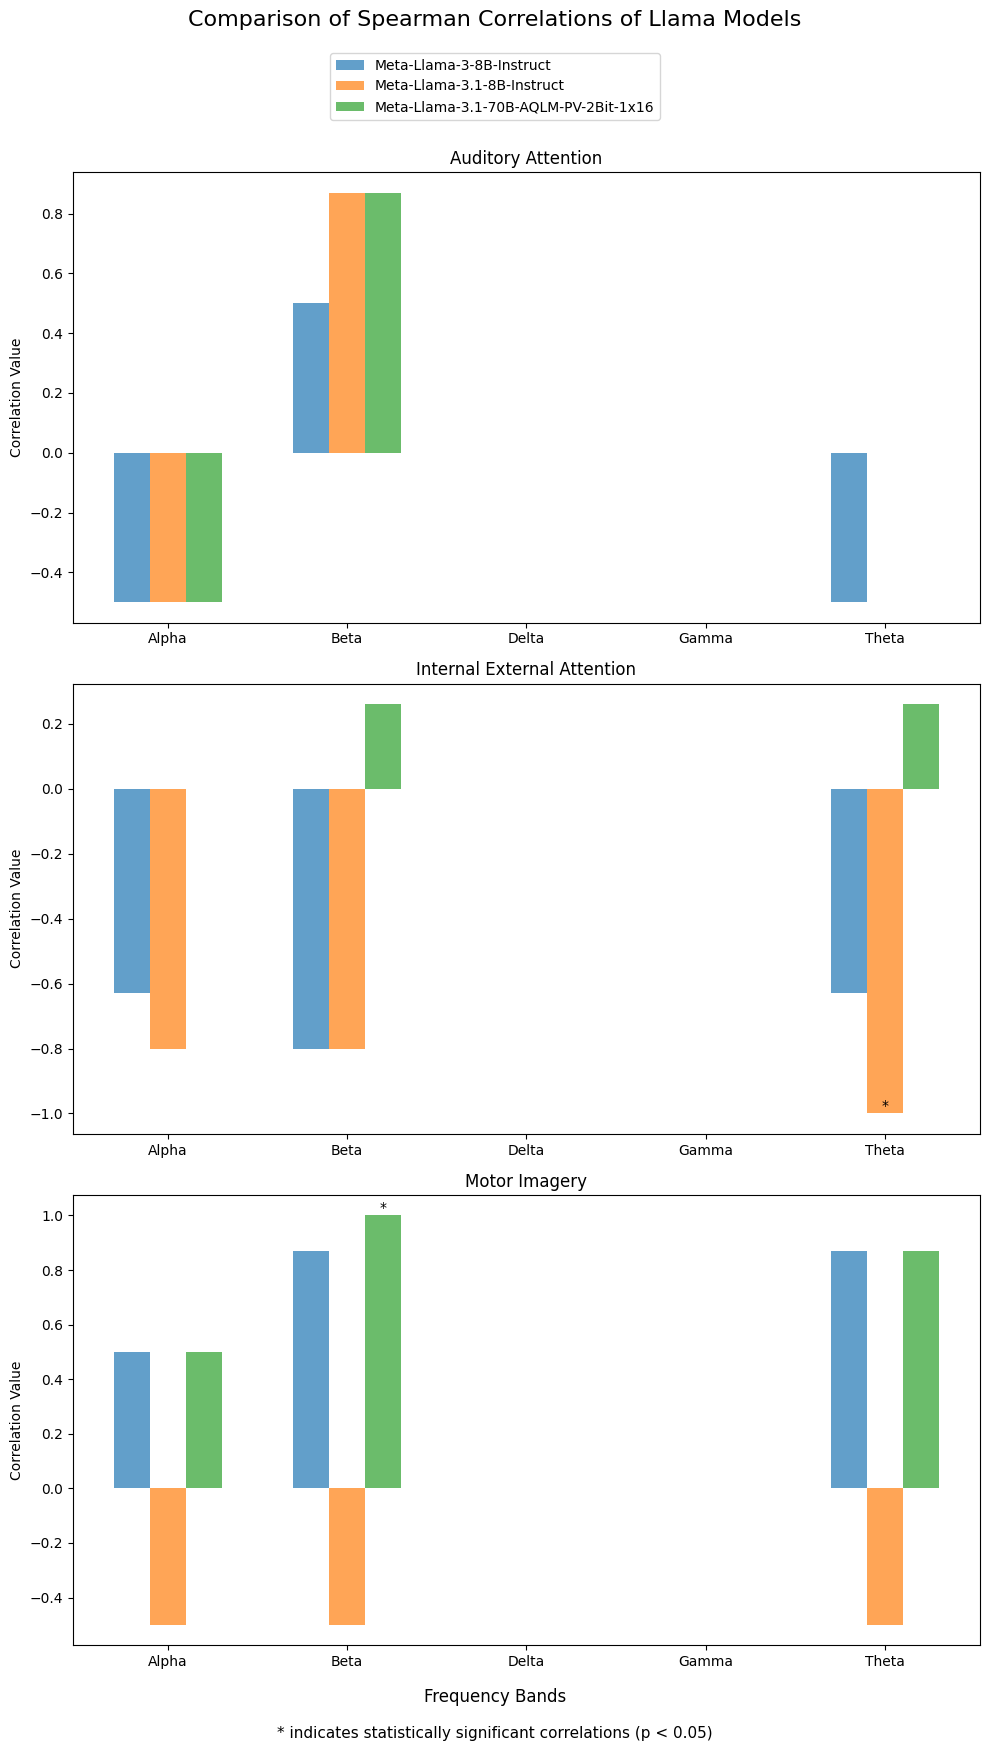

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the three configurations
correlations = {
    "llama3": cor_llama3,
    "llama3_1": cor_llama3_1,
    "llama_AQLM": cor_llama_AQLM
}

p_values = {
    "llama3": p_llama3,
    "llama3_1": p_llama3_1,
    "llama_AQLM": p_llama_AQLM
}

# Configuration and color setup
configurations = ["llama3", "llama3_1", "llama_AQLM"]
config_labels = ["Meta-Llama-3-8B-Instruct", "Meta-Llama-3.1-8B-Instruct", "Meta-Llama-3.1-70B-AQLM-PV-2Bit-1x16"]
config_colors = {
    "llama3": "#1f77b4",  # Blue
    "llama3_1": "#ff7f0e",  # Orange
    "llama_AQLM": "#2ca02c"  # Green
}
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Spearman Correlations of Llama Models", fontsize=16, y=0.98)

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(correlations["llama3"][topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Plot each configuration as a set of bars for Spearman correlations only
    for i, config in enumerate(configurations):
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]

        # Plot Spearman bars
        bars_spearman = ax.bar(x - width + i * width, spearman_vals, width,
                               color=config_colors[config], alpha=0.7, label=f"Spearman {config_labels[i]}")

        # Add significance markers
        for j, p_spearman in enumerate(p_spearman_vals):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Legend
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


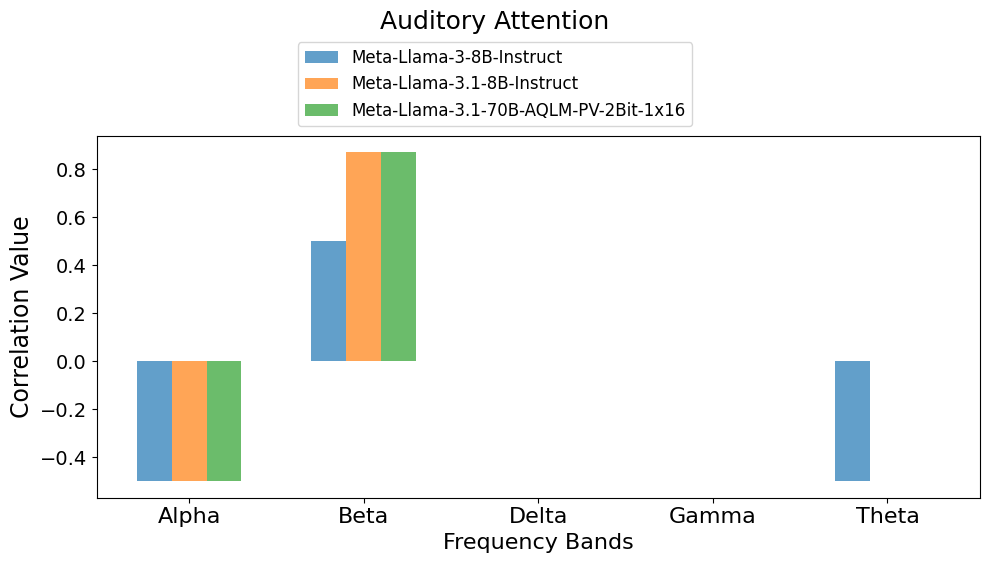

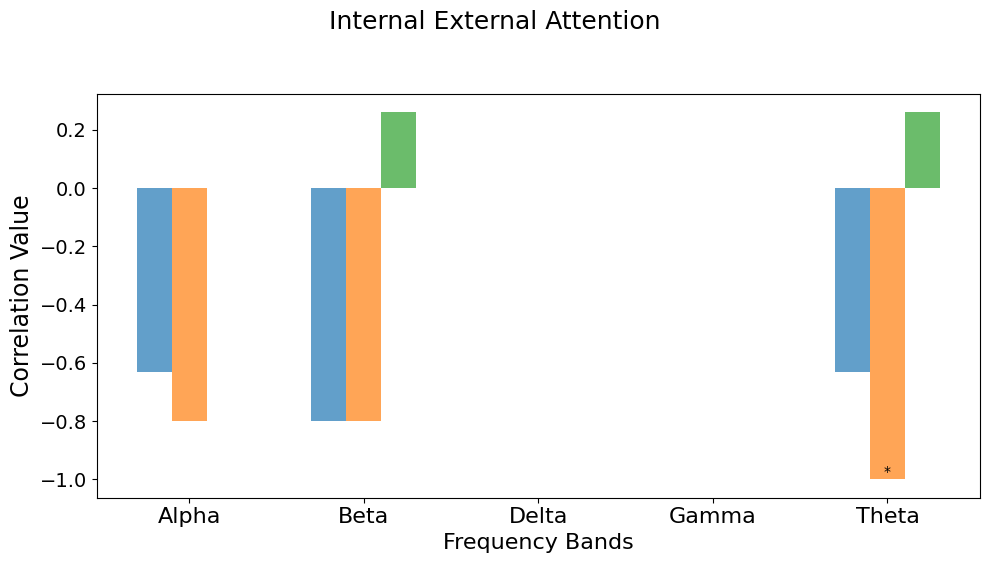

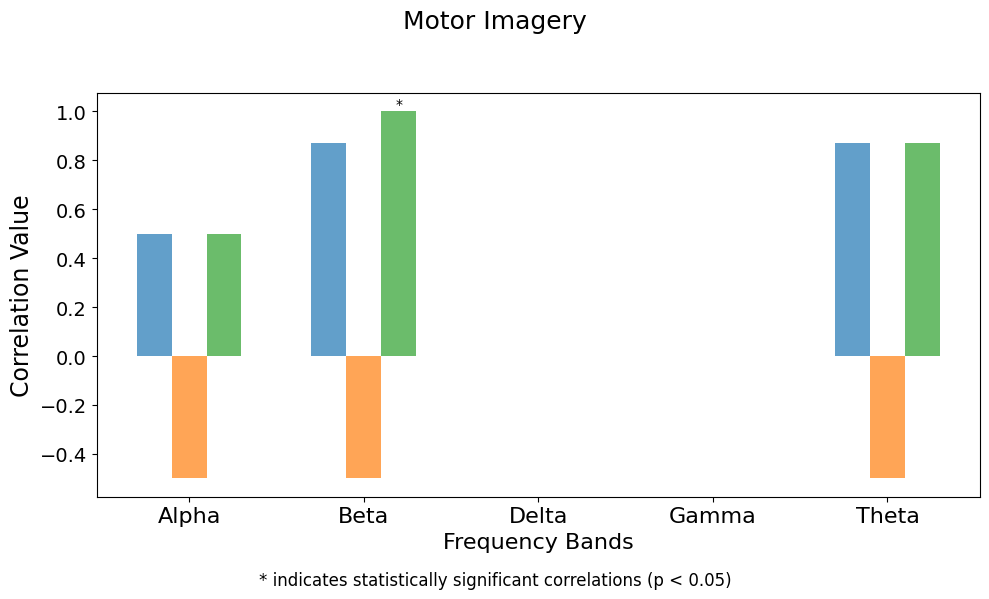

In [67]:
for idx, topic in enumerate(topics):
    freq_bands = list(correlations["llama3"][topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    # Plot each configuration as a set of bars for Spearman correlations only
    for i, config in enumerate(configurations):
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]

        # Plot Spearman bars
        bars_spearman = ax.bar(x - width + i * width, spearman_vals, width,
                               color=config_colors[config], alpha=0.7, label=f"Spearman {config_labels[i]}")

        # Add significance markers
        for j, p_spearman in enumerate(p_spearman_vals):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)

    ax.tick_params(axis='y', labelsize=14)

    # Add legend above title only for the first plot
    if idx == 0:
        fig.legend([f"{label}" for label in config_labels],
                   loc="upper center", fontsize=12, ncol=1, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only after the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


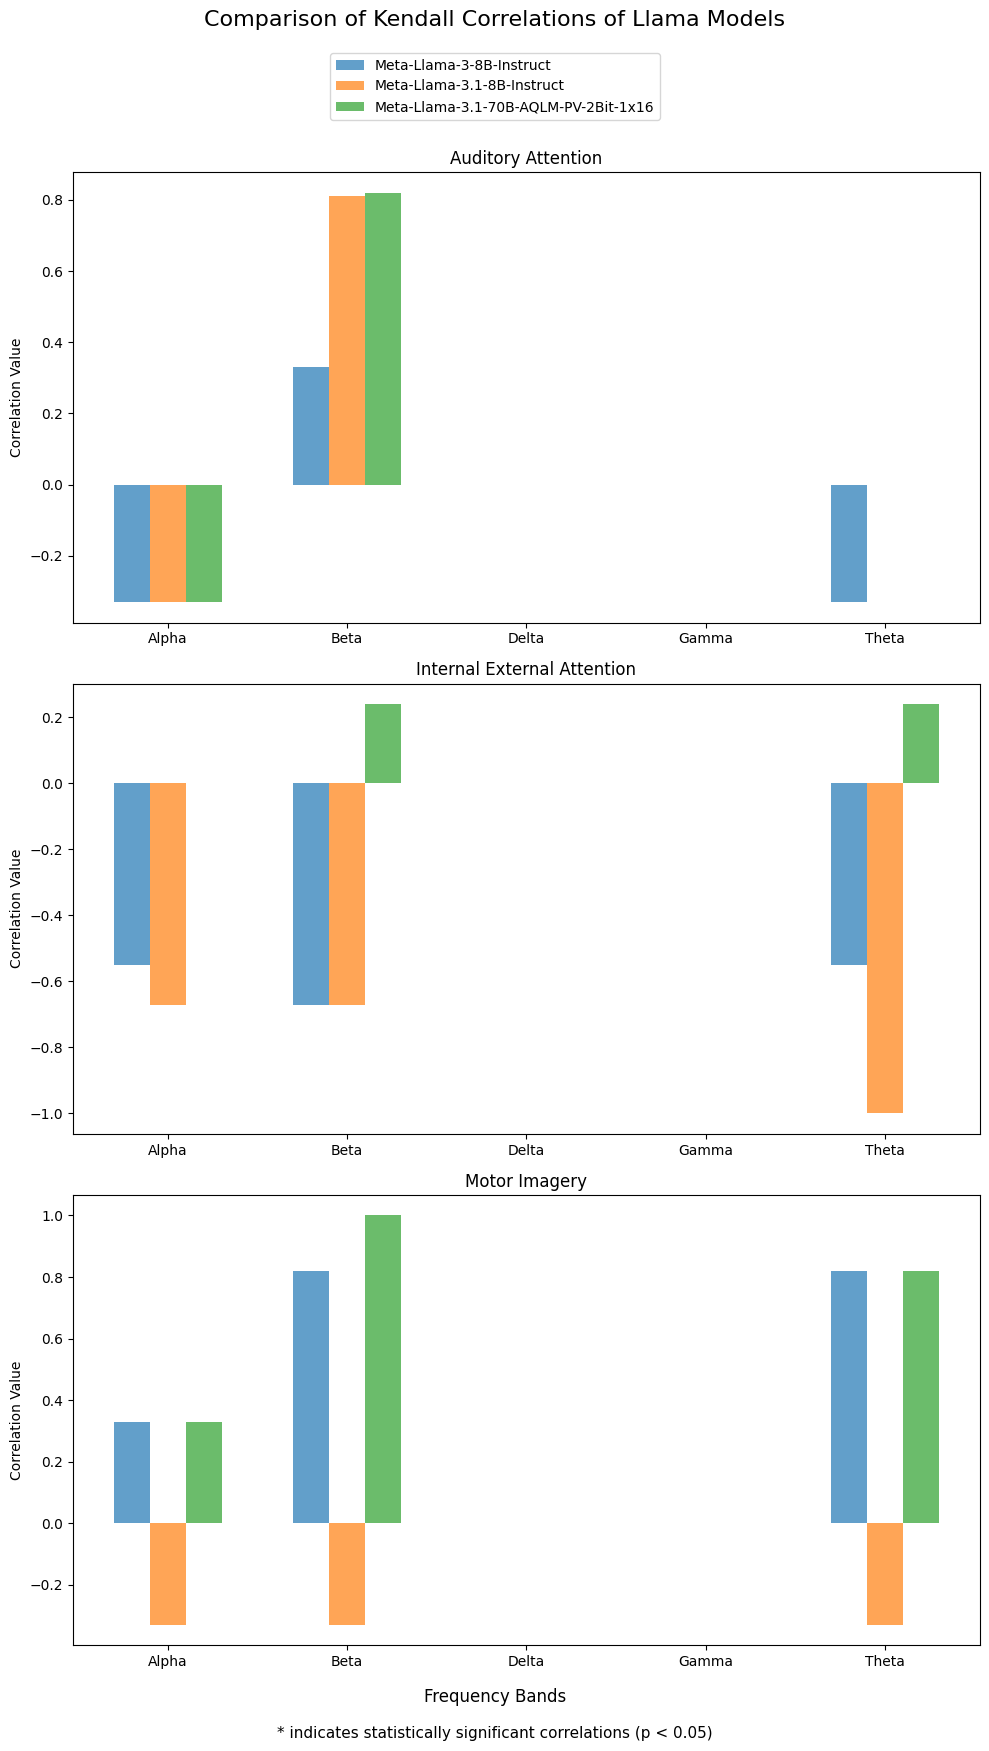

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the three configurations
correlations = {
    "llama3": cor_llama3,
    "llama3_1": cor_llama3_1,
    "llama_AQLM": cor_llama_AQLM
}

p_values = {
    "llama3": p_llama3,
    "llama3_1": p_llama3_1,
    "llama_AQLM": p_llama_AQLM
}

# Configuration and color setup
configurations = ["llama3", "llama3_1", "llama_AQLM"]
config_labels = ["Meta-Llama-3-8B-Instruct", "Meta-Llama-3.1-8B-Instruct", "Meta-Llama-3.1-70B-AQLM-PV-2Bit-1x16"]
config_colors = {
    "llama3": "#1f77b4",  # Blue
    "llama3_1": "#ff7f0e",  # Orange
    "llama_AQLM": "#2ca02c"  # Green
}
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Kendall Correlations of Llama Models", fontsize=16, y=0.98)

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(correlations["llama3"][topic]["Kendall"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Plot each configuration as a set of bars for Kendall correlations only
    for i, config in enumerate(configurations):
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot Kendall bars
        bars_kendall = ax.bar(x - width + i * width, kendall_vals, width,
                               color=config_colors[config], alpha=0.7, label=f"Kendall {config_labels[i]}")

        # Add significance markers
        for j, p_kendall in enumerate(p_kendall_vals):
            if p_kendall < significance_threshold:
                ax.text(x[j] - width + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Legend
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


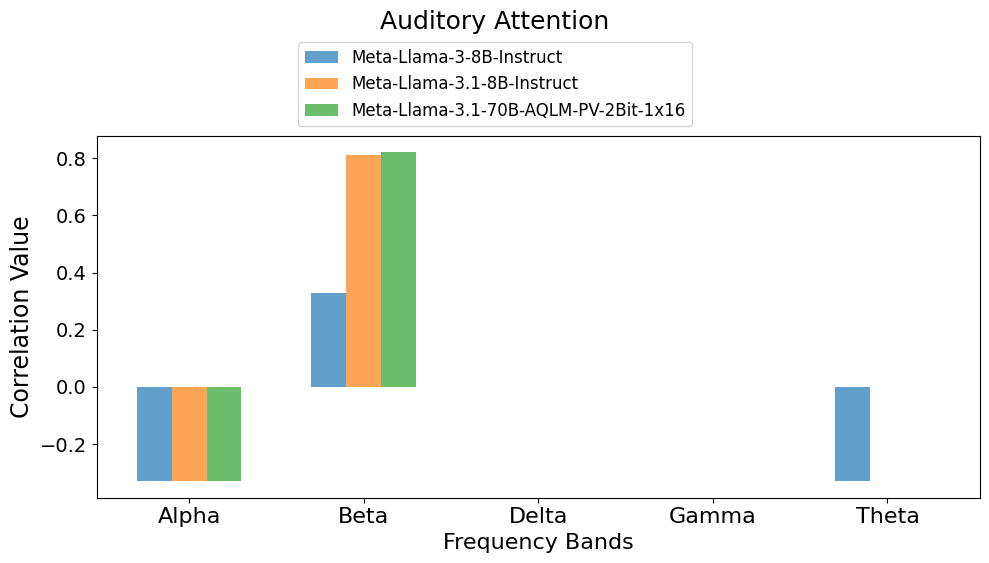

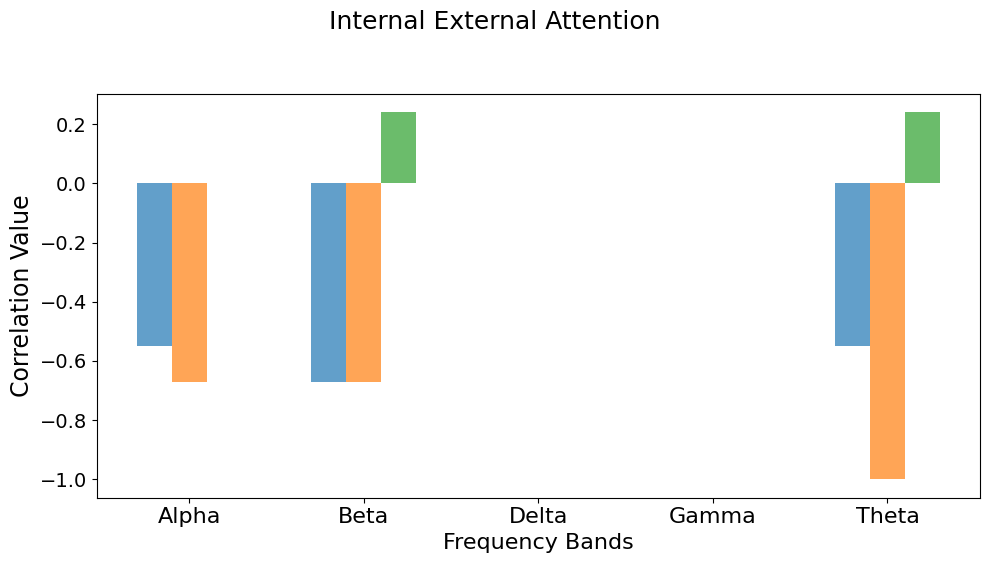

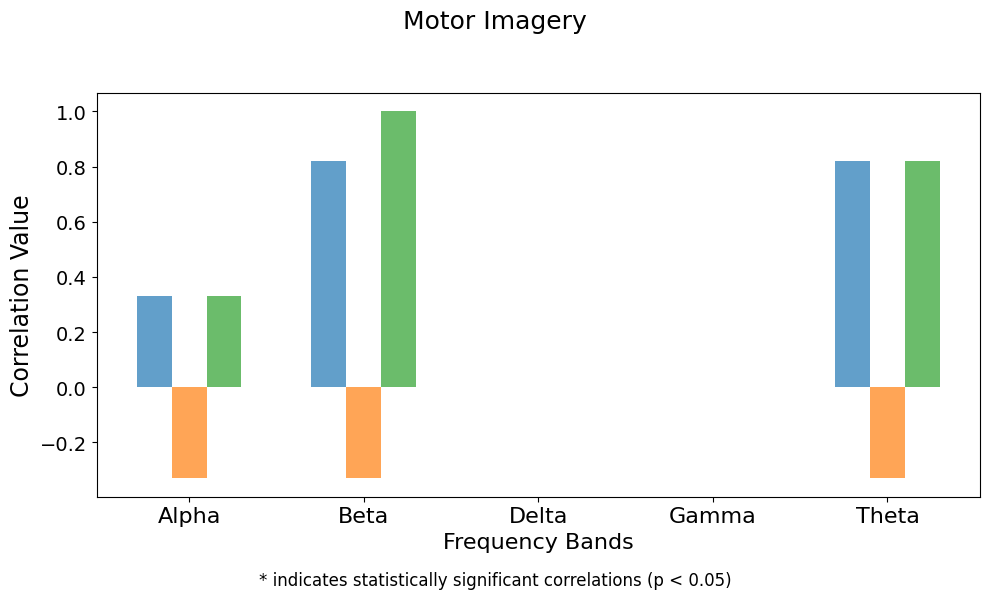

In [68]:
for idx, topic in enumerate(topics):
    freq_bands = list(correlations["llama3"][topic]["Kendall"].keys())
    x = np.arange(len(freq_bands))  # Position for frequency bands
    width = 0.2  # Width of each bar

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=18)

    # Plot each configuration as a set of bars for Kendall correlations only
    for i, config in enumerate(configurations):
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot Kendall bars
        bars_kendall = ax.bar(x - width + i * width, kendall_vals, width,
                              color=config_colors[config], alpha=0.7, label=f"Kendall {config_labels[i]}")

        # Add significance markers
        for j, p_kendall in enumerate(p_kendall_vals):
            if p_kendall < significance_threshold:
                ax.text(x[j] - width + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=16)
    ax.set_ylabel("Correlation Value", fontsize=17)
    ax.set_xlabel("Frequency Bands", fontsize=16)

    ax.tick_params(axis='y', labelsize=14)

    # Add legend above title only for the first plot
    if idx == 0:
        fig.legend([f"{label}" for label in config_labels],
                   loc="upper center", fontsize=12, ncol=1, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only after the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", 
                 ha='center', fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


In [69]:

recursive_spearman = {'AA': {'Alpha': {'p_value': 1.0, 'rho': 0.0},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.6666666666666667, 'rho': -0.5}},
 'IEA': {'Alpha': {'p_value': 0.8, 'rho': -0.19999999999999998},
         'Beta': {'p_value': 0.7418011102528389, 'rho': 0.2581988897471611},
         'Delta': {'p_value': np.nan, 'rho': np.nan},
         'Gamma': {'p_value': np.nan, 'rho': np.nan},
         'Theta': {'p_value': 0.05131670194948612, 'rho': -0.9486832980505139}},
 'MI': {'Alpha': {'p_value': 0.6666666666666667, 'rho': 0.5},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387}}}

recursive_kendall = {'AA': {'Alpha': {'p_value': 1.0, 'tau': 0.0},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': -0.33333333333333337}},
 'IEA': {'Alpha': {'p_value': 1.0, 'tau': 0.0},
         'Beta': {'p_value': 0.6547208460185769, 'tau': 0.2357022603955159},
         'Delta': {'p_value': np.nan, 'tau': np.nan},
         'Gamma': {'p_value': np.nan, 'tau': np.nan},
         'Theta': {'p_value': 0.07095149242730563, 'tau': -0.912870929175277}},
 'MI': {'Alpha': {'p_value': 1.0, 'tau': 0.33333333333333337},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726}}}

semantic_spearman = {'AA': {'Alpha': {'p_value': 0.6666666666666667, 'rho': -0.5},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.6666666666666667, 'rho': -0.5}},
 'IEA': {'Alpha': {'p_value': 0.367544467966324, 'rho': -0.632455532033676},
         'Beta': {'p_value': np.nan, 'rho': np.nan},
         'Delta': {'p_value': np.nan, 'rho': np.nan},
         'Gamma': {'p_value': np.nan, 'rho': np.nan},
         'Theta': {'p_value': 0.367544467966324, 'rho': -0.632455532033676}},
 'MI': {'Alpha': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Beta': {'p_value': np.nan, 'rho': np.nan},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387}}}

semantic_kendall = {'AA': {'Alpha': {'p_value': 1.0, 'tau': -0.33333333333333337},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': -0.33333333333333337}},
 'IEA': {'Alpha': {'p_value': 0.2785986718379625, 'tau': -0.5477225575051662},
         'Beta': {'p_value': np.nan, 'tau': np.nan},
         'Delta': {'p_value': np.nan, 'tau': np.nan},
         'Gamma': {'p_value': np.nan, 'tau': np.nan},
         'Theta': {'p_value': 0.2785986718379625, 'tau': -0.5477225575051662}},
 'MI': {'Alpha': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Beta': {'p_value': np.nan, 'tau': np.nan},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726}}}

knowledge_spearman = {'AA': {'Alpha': {'p_value': 1.0, 'rho': 0.0},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 1.0, 'rho': 0.0}},
 'IEA': {'Alpha': {'p_value': 0.367544467966324, 'rho': -0.632455532033676},
         'Beta': {'p_value': 0.7418011102528389, 'rho': 0.2581988897471611},
         'Delta': {'p_value': np.nan, 'rho': np.nan},
         'Gamma': {'p_value': np.nan, 'rho': np.nan},
         'Theta': {'p_value': 0.05131670194948612, 'rho': -0.9486832980505139}},
 'MI': {'Alpha': {'p_value': 0.6666666666666667, 'rho': 0.5},
        'Beta': {'p_value': 0.6666666666666667, 'rho': 0.5},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.6666666666666667, 'rho': 0.5}}}
        
knowledge_kendall = {'AA': {'Alpha': {'p_value': 1.0, 'tau': 0.0},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': 0.0}},
 'IEA': {'Alpha': {'p_value': 0.2785986718379625, 'tau': -0.5477225575051662},
         'Beta': {'p_value': 0.6547208460185769, 'tau': 0.2357022603955159},
         'Delta': {'p_value': np.nan, 'tau': np.nan},
         'Gamma': {'p_value': np.nan, 'tau': np.nan},
         'Theta': {'p_value': 0.07095149242730563, 'tau': -0.912870929175277}},
 'MI': {'Alpha': {'p_value': 1.0, 'tau': 0.33333333333333337},
        'Beta': {'p_value': 1.0, 'tau': 0.33333333333333337},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': 0.33333333333333337}}}

cot_spearman = {'AA': {'Alpha': {'p_value': 1.0, 'rho': 0.0},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 1.0, 'rho': 0.0}},
 'IEA': {'Alpha': {'p_value': 0.6, 'rho': -0.39999999999999997},
         'Beta': {'p_value': 0.22540333075851657, 'rho': -0.7745966692414834},
         'Delta': {'p_value': np.nan, 'rho': np.nan},
         'Gamma': {'p_value': np.nan, 'rho': np.nan},
         'Theta': {'p_value': 0.6, 'rho': -0.39999999999999997}},
 'MI': {'Alpha': {'p_value': 0.6666666666666667, 'rho': -0.5},
        'Beta': {'p_value': 1.0, 'rho': 0.0},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 1.0, 'rho': 0.0}}}
        
cot_kendall = {'AA': {'Alpha': {'p_value': 1.0, 'tau': 0.0},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': np.nan, 'tau':np. nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': 0.0}},
 'IEA': {'Alpha': {'p_value': 0.75, 'tau': -0.3333333333333334},
         'Beta': {'p_value': 0.17971249487899976, 'tau': -0.7071067811865477},
         'Delta': {'p_value': np.nan, 'tau': np.nan},
         'Gamma': {'p_value': np.nan, 'tau': np.nan},
         'Theta': {'p_value': 0.75, 'tau': -0.3333333333333334}},
 'MI': {'Alpha': {'p_value': 1.0, 'tau': -0.33333333333333337},
        'Beta': {'p_value': 1.0, 'tau': 0.0},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': 0.0}}}

In [70]:
# Mapping from category keys to their full names
category_mapping = {
    'AA': 'Auditory Attention',
    'IEA': 'Internal External Attention',
    'MI': 'Motor Imagery'
}

# Initialize the target dictionaries
correlation_results_llm = {}
p_value_results_llm = {}

# Iterate through each category and metric to populate the target dictionaries
for category_key, full_name in category_mapping.items():
    correlation_results_llm[full_name] = {"Spearman": {}, "Kendall": {}}
    p_value_results_llm[full_name] = {"Spearman": {}, "Kendall": {}}
    
    # Process Spearman's results
    for metric, data in recursive_spearman[category_key].items():
        rho = data.get('rho', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round rho if it's a valid number
        if isinstance(rho, float) and not np.isnan(rho):
            rho_rounded = round(rho, 2)
        else:
            rho_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        correlation_results_llm[full_name]["Spearman"][metric] = rho_rounded
        p_value_results_llm[full_name]["Spearman"][metric] = p_val_rounded
    
    # Process Kendall's results
    for metric, data in recursive_kendall[category_key].items():
        tau = data.get('tau', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round tau if it's a valid number
        if isinstance(tau, float) and not np.isnan(tau):
            tau_rounded = round(tau, 2)
        else:
            tau_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        correlation_results_llm[full_name]["Kendall"][metric] = tau_rounded
        p_value_results_llm[full_name]["Kendall"][metric] = p_val_rounded

# Example usage: Print the resulting dictionaries
print("Correlation Results LLM:")
print(correlation_results_llm)
print("\nP-Value Results LLM:")
print(p_value_results_llm)

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 0.0, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': -0.5}, 'Kendall': {'Alpha': 0.0, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.2, 'Beta': 0.26, 'Delta': nan, 'Gamma': nan, 'Theta': -0.95}, 'Kendall': {'Alpha': 0.0, 'Beta': 0.24, 'Delta': nan, 'Gamma': nan, 'Theta': -0.91}}, 'Motor Imagery': {'Spearman': {'Alpha': 0.5, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': 0.87}, 'Kendall': {'Alpha': 0.33, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': 0.82}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 1.0, 'Beta': 0.33, 'Delta': nan, 'Gamma': nan, 'Theta': 0.67}, 'Kendall': {'Alpha': 1.0, 'Beta': 0.22, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}}, 'Internal External Attention': {'Spearman': {'Alpha': 0.8, 'Beta': 0.74, 'Delta': nan, 'Gamma': nan, 'Theta': 0.05}, 'Kendall': {'Alpha': 1.0, 'Beta': 0.65, 'Delta': nan, 

In [71]:
cor_recursive = correlation_results_llm
p_recursive = p_value_results_llm

In [72]:
# Initialize the target dictionaries
cor_semantic = {}
p_semantic = {}

# Iterate through each category and metric to populate the target dictionaries
for category_key, full_name in category_mapping.items():
    cor_semantic[full_name] = {"Spearman": {}, "Kendall": {}}
    p_semantic[full_name] = {"Spearman": {}, "Kendall": {}}
    
    # Process Spearman's results
    for metric, data in semantic_spearman[category_key].items():
        rho = data.get('rho', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round rho if it's a valid number
        if isinstance(rho, float) and not np.isnan(rho):
            rho_rounded = round(rho, 2)
        else:
            rho_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_semantic[full_name]["Spearman"][metric] = rho_rounded
        p_semantic[full_name]["Spearman"][metric] = p_val_rounded
    
    # Process Kendall's results
    for metric, data in semantic_kendall[category_key].items():
        tau = data.get('tau', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round tau if it's a valid number
        if isinstance(tau, float) and not np.isnan(tau):
            tau_rounded = round(tau, 2)
        else:
            tau_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_semantic[full_name]["Kendall"][metric] = tau_rounded
        p_semantic[full_name]["Kendall"][metric] = p_val_rounded

# Example usage: Print the resulting dictionaries
print("Correlation Results LLM:")
print(cor_semantic)
print("\nP-Value Results LLM:")
print(p_semantic)

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': -0.5, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': -0.5}, 'Kendall': {'Alpha': -0.33, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.63, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.63}, 'Kendall': {'Alpha': -0.55, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': -0.55}}, 'Motor Imagery': {'Spearman': {'Alpha': 0.87, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': 0.87}, 'Kendall': {'Alpha': 0.82, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': 0.82}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 0.67, 'Beta': 0.33, 'Delta': nan, 'Gamma': nan, 'Theta': 0.67}, 'Kendall': {'Alpha': 1.0, 'Beta': 0.22, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}}, 'Internal External Attention': {'Spearman': {'Alpha': 0.37, 'Beta': nan, 'Delta': nan, 'Gamma': nan, 'Theta': 0.37}, 'Kendall': {'Alpha': 0.28, 'Beta': nan, 'Delta': n

In [73]:
# Initialize the target dictionaries
cor_knowledge = {}
p_knowledge = {}

# Iterate through each category and metric to populate the target dictionaries
for category_key, full_name in category_mapping.items():
    cor_knowledge[full_name] = {"Spearman": {}, "Kendall": {}}
    p_knowledge[full_name] = {"Spearman": {}, "Kendall": {}}
    
    # Process Spearman's results
    for metric, data in knowledge_spearman[category_key].items():
        rho = data.get('rho', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round rho if it's a valid number
        if isinstance(rho, float) and not np.isnan(rho):
            rho_rounded = round(rho, 2)
        else:
            rho_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_knowledge[full_name]["Spearman"][metric] = rho_rounded
        p_knowledge[full_name]["Spearman"][metric] = p_val_rounded
    
    # Process Kendall's results
    for metric, data in knowledge_kendall[category_key].items():
        tau = data.get('tau', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round tau if it's a valid number
        if isinstance(tau, float) and not np.isnan(tau):
            tau_rounded = round(tau, 2)
        else:
            tau_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_knowledge[full_name]["Kendall"][metric] = tau_rounded
        p_knowledge[full_name]["Kendall"][metric] = p_val_rounded

# Example usage: Print the resulting dictionaries
print("Correlation Results LLM:")
print(cor_knowledge)
print("\nP-Value Results LLM:")
print(p_knowledge)

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 0.0, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}, 'Kendall': {'Alpha': 0.0, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.63, 'Beta': 0.26, 'Delta': nan, 'Gamma': nan, 'Theta': -0.95}, 'Kendall': {'Alpha': -0.55, 'Beta': 0.24, 'Delta': nan, 'Gamma': nan, 'Theta': -0.91}}, 'Motor Imagery': {'Spearman': {'Alpha': 0.5, 'Beta': 0.5, 'Delta': nan, 'Gamma': nan, 'Theta': 0.5}, 'Kendall': {'Alpha': 0.33, 'Beta': 0.33, 'Delta': nan, 'Gamma': nan, 'Theta': 0.33}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 1.0, 'Beta': 0.33, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}, 'Kendall': {'Alpha': 1.0, 'Beta': 0.22, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}}, 'Internal External Attention': {'Spearman': {'Alpha': 0.37, 'Beta': 0.74, 'Delta': nan, 'Gamma': nan, 'Theta': 0.05}, 'Kendall': {'Alpha': 0.28, 'Beta': 0.65, 'Delta': nan, '

In [74]:
# Initialize the target dictionaries
cor_cot = {}
p_cot = {}

# Iterate through each category and metric to populate the target dictionaries
for category_key, full_name in category_mapping.items():
    cor_cot[full_name] = {"Spearman": {}, "Kendall": {}}
    p_cot[full_name] = {"Spearman": {}, "Kendall": {}}
    
    # Process Spearman's results
    for metric, data in cot_spearman[category_key].items():
        rho = data.get('rho', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round rho if it's a valid number
        if isinstance(rho, float) and not np.isnan(rho):
            rho_rounded = round(rho, 2)
        else:
            rho_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_cot[full_name]["Spearman"][metric] = rho_rounded
        p_cot[full_name]["Spearman"][metric] = p_val_rounded
    
    # Process Kendall's results
    for metric, data in cot_kendall[category_key].items():
        tau = data.get('tau', np.nan)
        p_val = data.get('p_value', np.nan)
        
        # Round tau if it's a valid number
        if isinstance(tau, float) and not np.isnan(tau):
            tau_rounded = round(tau, 2)
        else:
            tau_rounded = np.nan
        
        # Round p_value if it's a valid number
        if isinstance(p_val, float) and not np.isnan(p_val):
            p_val_rounded = round(p_val, 2)
        else:
            p_val_rounded = np.nan
        
        cor_cot[full_name]["Kendall"][metric] = tau_rounded
        p_cot[full_name]["Kendall"][metric] = p_val_rounded

# Example usage: Print the resulting dictionaries
print("Correlation Results LLM:")
print(cor_cot)
print("\nP-Value Results LLM:")
print(p_cot)

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 0.0, 'Beta': 0.87, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}, 'Kendall': {'Alpha': 0.0, 'Beta': 0.82, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.4, 'Beta': -0.77, 'Delta': nan, 'Gamma': nan, 'Theta': -0.4}, 'Kendall': {'Alpha': -0.33, 'Beta': -0.71, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Motor Imagery': {'Spearman': {'Alpha': -0.5, 'Beta': 0.0, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}, 'Kendall': {'Alpha': -0.33, 'Beta': 0.0, 'Delta': nan, 'Gamma': nan, 'Theta': 0.0}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': 1.0, 'Beta': 0.33, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}, 'Kendall': {'Alpha': 1.0, 'Beta': 0.22, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}}, 'Internal External Attention': {'Spearman': {'Alpha': 0.6, 'Beta': 0.23, 'Delta': nan, 'Gamma': nan, 'Theta': 0.6}, 'Kendall': {'Alpha': 0.75, 'Beta': 0.18, 'Delta': nan, 'Ga

In [75]:
cor_combined = {
    "Auditory Attention": {
        "Spearman": {"Alpha": -0.5, "Beta": 0.87, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0},
        "Kendall":  {"Alpha": -0.33, "Beta": 0.82, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 0.0, "Beta": 0.26, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.26},
        "Kendall":  {"Alpha": 0.0, "Beta": 0.24, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.24}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.5, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.87},
        "Kendall":  {"Alpha": 0.33, "Beta": 1.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.82}
    }
}

p_combined = {
    "Auditory Attention": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.22, "Delta": np.nan, "Gamma": np.nan, "Theta": 1.0}
    },
    "Internal External Attention": {
        "Spearman": {"Alpha": 1.0, "Beta": 0.74, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.74},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.65, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.65}
    },
    "Motor Imagery": {
        "Spearman": {"Alpha": 0.67, "Beta": 0.0, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.33},
        "Kendall":  {"Alpha": 1.0, "Beta": 0.33, "Delta": np.nan, "Gamma": np.nan, "Theta": 0.22}
    }
}

In [76]:
cor_recursive
p_recursive

cor_semantic
p_semantic

cor_knowledge
p_knowledge

cor_cot
p_cot

cor_combined
p_combined

{'Auditory Attention': {'Spearman': {'Alpha': 0.67,
   'Beta': 0.33,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 1.0},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.22,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 1.0}},
 'Internal External Attention': {'Spearman': {'Alpha': 1.0,
   'Beta': 0.74,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.74},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.65,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.65}},
 'Motor Imagery': {'Spearman': {'Alpha': 0.67,
   'Beta': 0.0,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.33},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.33,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.22}}}

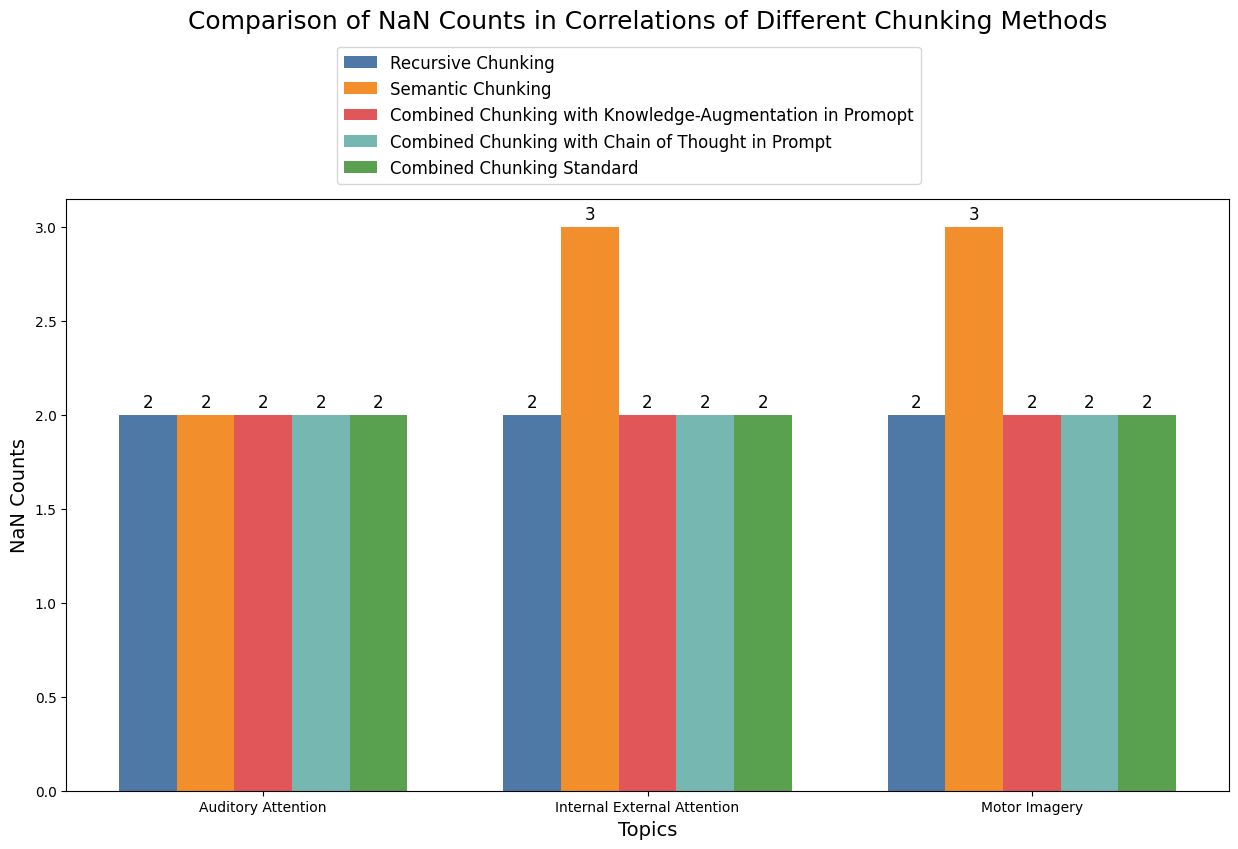

In [91]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "recursive": sum(np.isnan(cor_recursive[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in cor_recursive[topic][metric]),
        "semantic": sum(np.isnan(cor_semantic[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_semantic[topic][metric]),
        "knowledge": sum(np.isnan(cor_knowledge[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_knowledge[topic][metric]),
        "cot": sum(np.isnan(cor_cot[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_cot[topic][metric]),
        "combined": sum(np.isnan(cor_combined[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_combined[topic][metric])
    }
    for topic in topics
}
config_labels = ["Recursive Chunking", "Semantic Chunking", "Combined Chunking with Knowledge-Augmentation in Promopt", "Combined Chunking with Chain of Thought in Prompt", "Combined Chunking Standard"]

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_recursive = [nan_counts[topic]["recursive"] for topic in topics_list]
nan_semantic = [nan_counts[topic]["semantic"] for topic in topics_list]
nan_knowledge = [nan_counts[topic]["knowledge"] for topic in topics_list]
nan_cot = [nan_counts[topic]["cot"] for topic in topics_list]
nan_combined = [nan_counts[topic]["combined"] for topic in topics_list]

# Set up positions for each bar group
x = np.arange(len(topics_list))
width = 0.15  # Reduced width to accommodate five bars

fig, ax = plt.subplots(figsize=(15, 8))

# Calculate offsets for five bars
offsets = [-2*width, -width, 0, width, 2*width]

# Corrected positions for each set of bars
bars_recursive = ax.bar(x + offsets[0], nan_recursive, width, label="recursive", color="#4e79a7")  # Slate Blue
bars_semantic = ax.bar(x + offsets[1], nan_semantic, width, label="semantic", color="#f28e2b")     # Orange
bars_knowledge = ax.bar(x + offsets[2], nan_knowledge, width, label="knowledge", color="#e15759")  # Red
bars_cot = ax.bar(x + offsets[3], nan_cot, width, label="cot", color="#76b7b2")      # Teal
bars_combined = ax.bar(x + offsets[4], nan_combined, width, label="combined", color="#59a14f")    # Green

# Add labels and title
ax.set_xlabel("Topics", fontsize=14)
ax.set_ylabel("NaN Counts", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(topics_list)

# Place legend below title with more spacing
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=12, ncol=1, bbox_to_anchor=(0.5, 1.05))

# Add the title below the legend by using plt.text
plt.text(0.5, 1.3, "Comparison of NaN Counts in Correlations of Different Chunking Methods",
         ha='center', va='center', transform=ax.transAxes, fontsize=18)

# Increase space above the plot
plt.subplots_adjust(top=0.85)

# Annotate NaN counts on each bar
for bars in [bars_recursive, bars_semantic, bars_knowledge, bars_cot, bars_combined]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                    xytext=(0, 3),  # Offset from the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

plt.show()


In [87]:
# Data for the three configurations
correlations = {
    "recursive": cor_recursive,
    "semantic": cor_semantic,
    "knowledge": cor_knowledge,
    "cot": cor_cot,
    "combined": cor_combined
}

p_values = {
    "recursive": p_recursive,
    "semantic": p_semantic,
    "knowledge": p_knowledge,
    "cot": p_cot,
    "combined": p_combined
}

# Configuration and color setup
configurations = ["recursive", "semantic", "knowledge", "cot", "combined"]

config_colors = {
    "recursive": "#1f77b4",  # Blue
    "semantic": "#ff7f0e",   # Orange
    "knowledge": "#2ca02c",  # Green
    "cot": "#d62728",        # Red
    "combined": "#9467bd"    # Purple
}

/var/folders/jh/77msf8k92y97h0j2njj_w7mh0000gn/T/ipykernel_99775/2343747661.py:74: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]


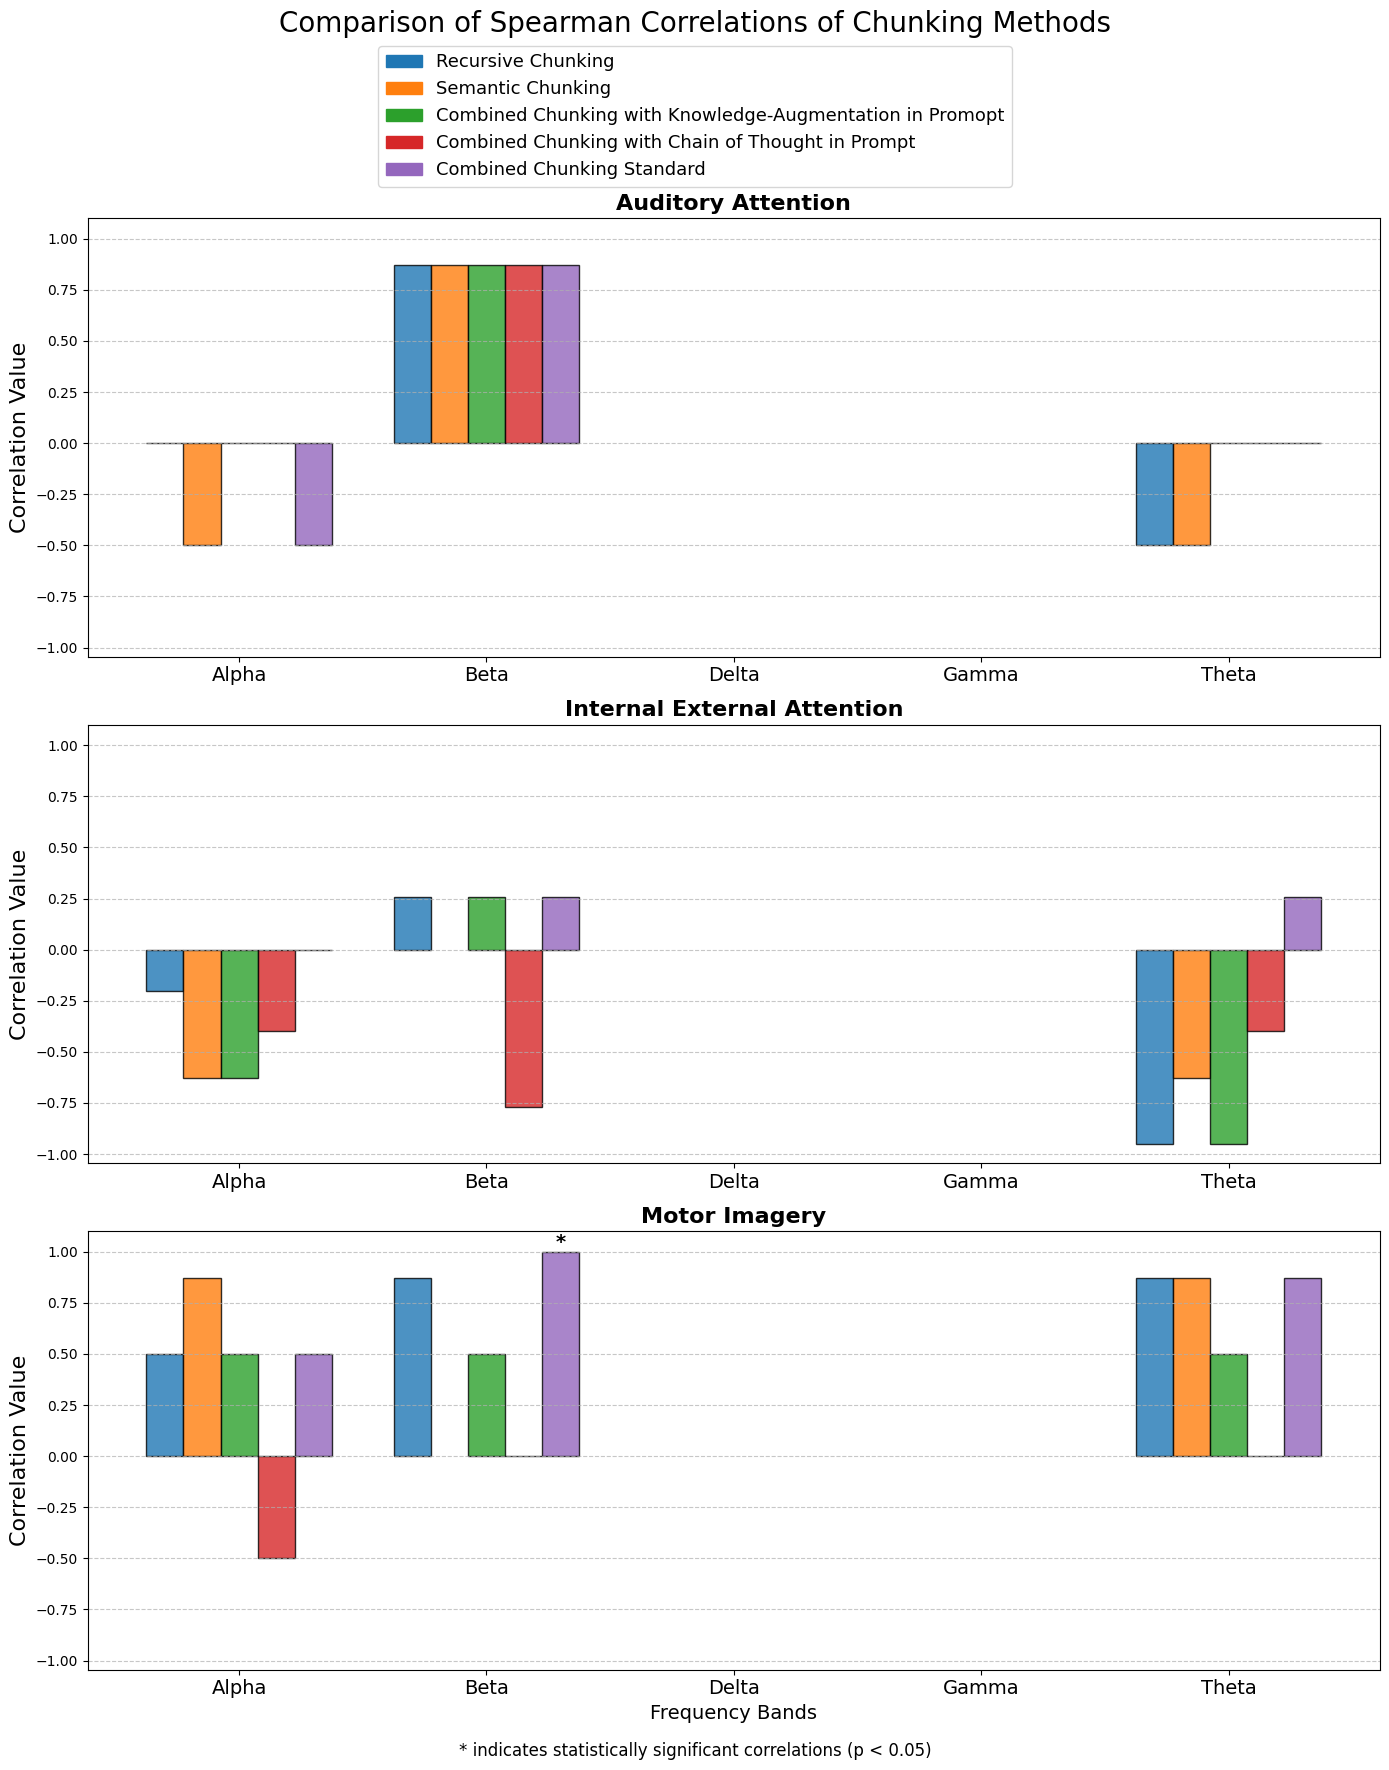

In [92]:
config_labels = ["Recursive Chunking", "Semantic Chunking", "Combined Chunking with Knowledge-Augmentation in Promopt", "Combined Chunking with Chain of Thought in Prompt", "Combined Chunking Standard"]

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=False)
fig.suptitle("Comparison of Spearman Correlations of Chunking Methods", fontsize=20, y=0.99)

# Define the number of configurations and frequency bands
n_configs = len(configurations)
n_bands = len(freq_bands)

# Define bar width and positions
bar_width = 0.15
# Positions of groups on x-axis
indices = np.arange(n_bands)

# To determine global y-axis limits, find the min and max across all data
all_spearman_values = []
for topic in topics:
    for config in configurations:
        for band in freq_bands:
            val = correlations[config][topic]["Spearman"].get(band, np.nan)
            if not np.isnan(val):
                all_spearman_values.append(val)

# Calculate dynamic y-axis limits with a 10% margin
y_min = min(all_spearman_values) - 0.1 * abs(min(all_spearman_values)) if min(all_spearman_values) < 0 else 0
y_max = max(all_spearman_values) + 0.1 * abs(max(all_spearman_values))

for idx, topic in enumerate(topics):
    ax = axes[idx]
    
    # Iterate over configurations to plot each set of bars
    for i, config in enumerate(configurations):
        # Calculate position offset for each configuration
        offset = (i - n_configs / 2) * bar_width + bar_width / 2
        bar_positions = indices + offset
        
        # Extract Spearman correlation values
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        # Extract p-values
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        
        # Plot bars
        bars = ax.bar(bar_positions, spearman_vals, bar_width, label=config_labels[i],
                      color=config_colors[config], alpha=0.8, edgecolor='black')
        
        # Add significance markers
        for j, (bar, p_val) in enumerate(zip(bars, p_spearman_vals)):
            if p_val < significance_threshold:
                height = bar.get_height()
                # Adjust the position of the asterisk based on the bar's height
                if height >= 0:
                    y_position = height
                    va = 'bottom'
                else:
                    y_position = height
                    va = 'top'
                ax.text(bar.get_x() + bar.get_width() / 2, y_position, '*',
                        ha='center', va=va, color='black', fontsize=14, fontweight='bold')
    
    # Set title and labels for each subplot
    ax.set_title(f"{topic}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Correlation Value", fontsize=16)
    ax.set_xticks(indices)
    ax.set_xticklabels(freq_bands, fontsize=14)
    
    # Set dynamic y-axis limits with margin
    ax.set_ylim(y_min, y_max)
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
# Create a single legend for all subplots
handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]
fig.legend(handles, config_labels, loc='upper center', fontsize=13, ncol=1, bbox_to_anchor=(0.5, 0.975))

# Add a note for significance
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=12)

# Set x-axis label on the bottom subplot
axes[-1].set_xlabel("Frequency Bands", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


/var/folders/jh/77msf8k92y97h0j2njj_w7mh0000gn/T/ipykernel_99775/2179301403.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]


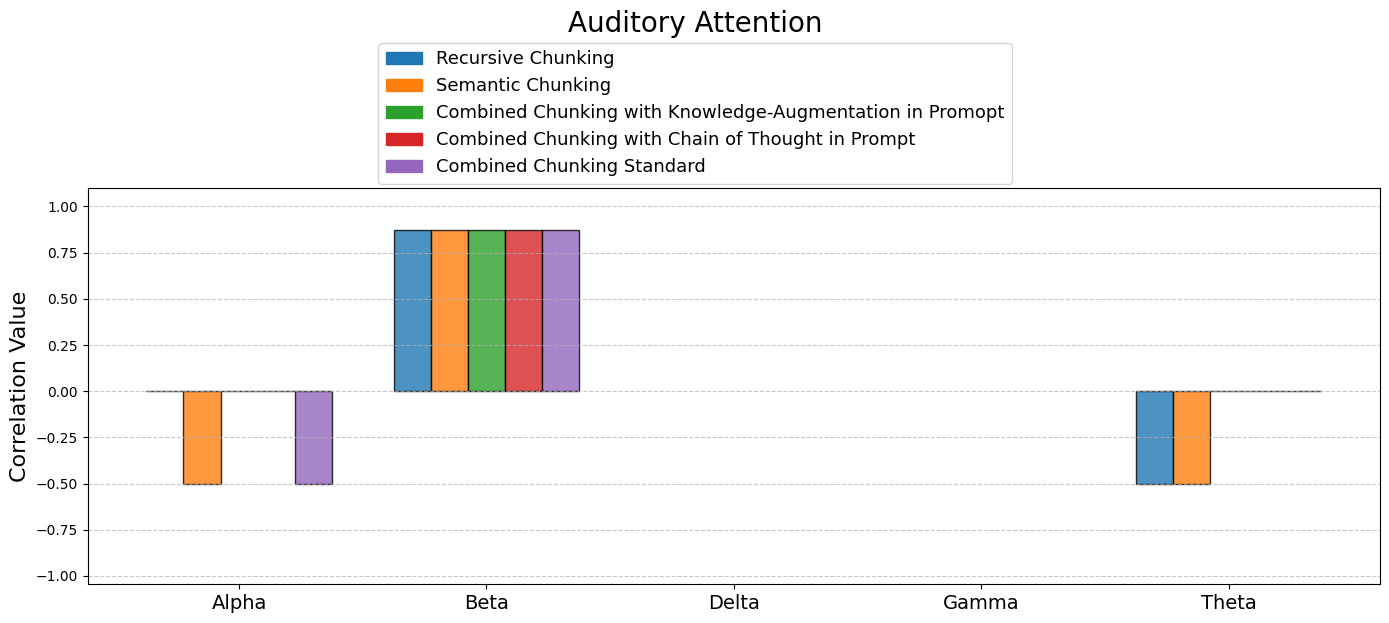

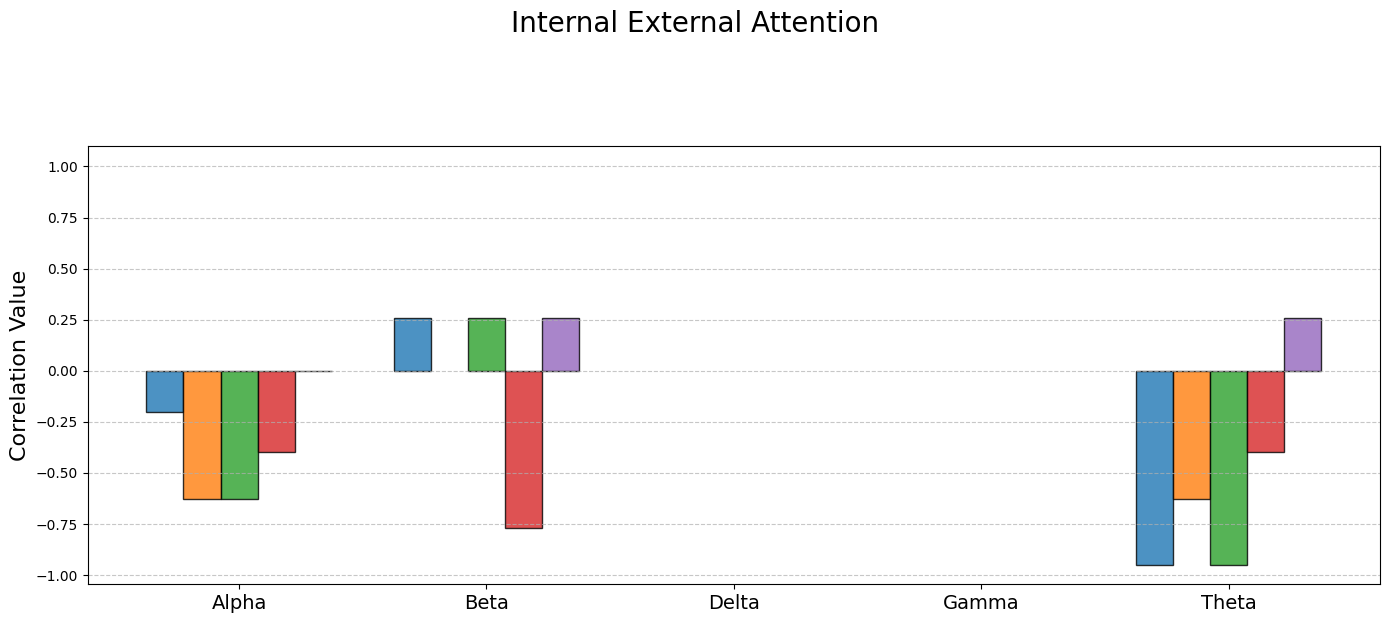

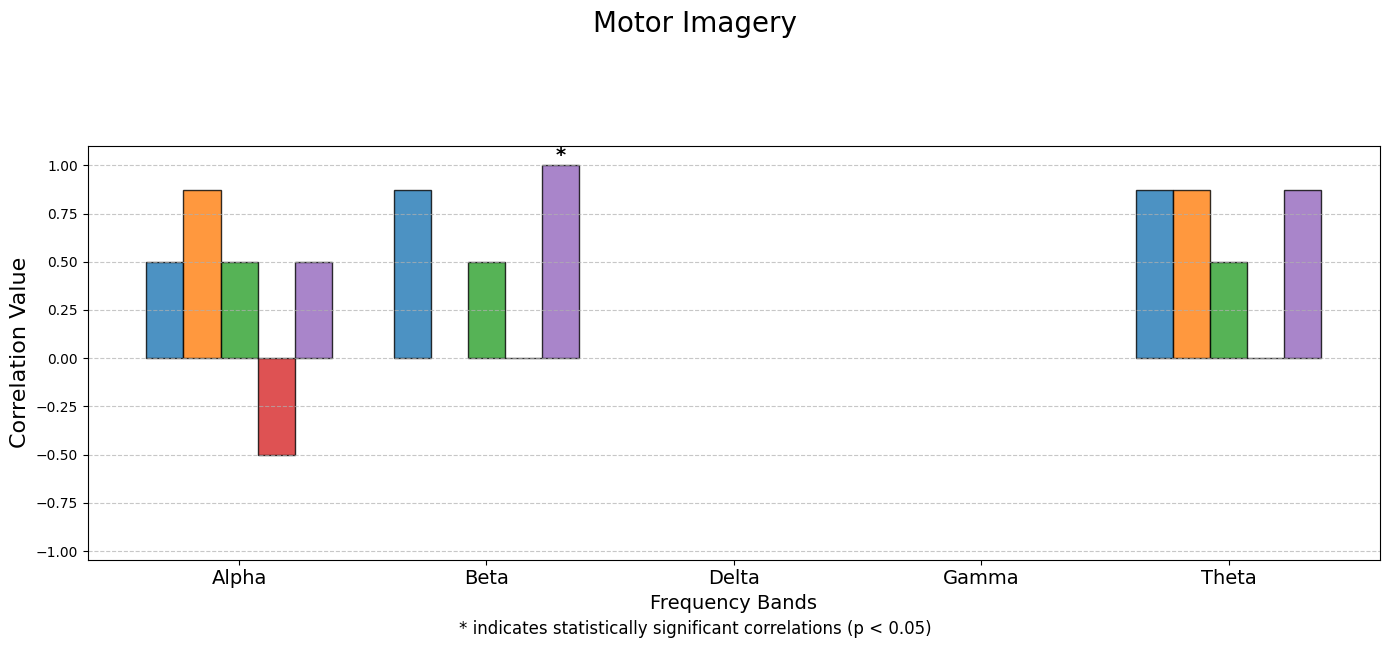

In [101]:
for idx, topic in enumerate(topics):
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle(topic, fontsize=20, y=1.06)
    
    # Iterate over configurations to plot each set of bars
    for i, config in enumerate(configurations):
        # Calculate position offset for each configuration
        offset = (i - n_configs / 2) * bar_width + bar_width / 2
        bar_positions = indices + offset
        
        # Extract Spearman correlation values
        spearman_vals = [correlations[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        # Extract p-values
        p_spearman_vals = [p_values[config][topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        
        # Plot bars
        bars = ax.bar(bar_positions, spearman_vals, bar_width, label=config_labels[i],
                      color=config_colors[config], alpha=0.8, edgecolor='black')
        
        # Add significance markers
        for j, (bar, p_val) in enumerate(zip(bars, p_spearman_vals)):
            if p_val < significance_threshold:
                height = bar.get_height()
                # Adjust the position of the asterisk based on the bar's height
                if height >= 0:
                    y_position = height
                    va = 'bottom'
                else:
                    y_position = height
                    va = 'top'
                ax.text(bar.get_x() + bar.get_width() / 2, y_position, '*',
                        ha='center', va=va, color='black', fontsize=14, fontweight='bold')
    
    # Set title and labels for each subplot
    ax.set_ylabel("Correlation Value", fontsize=16)
    ax.set_xticks(indices)
    ax.set_xticklabels(freq_bands, fontsize=14)
    
    # Set dynamic y-axis limits with margin
    ax.set_ylim(y_min, y_max)
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add legend above the title for the first plot
    if idx == 0:
        handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]
        fig.legend(handles, config_labels, loc='upper center', fontsize=13, ncol=1, bbox_to_anchor=(0.5, 1.02))

    # Add significance note only in the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=12)

    # Add x-axis label for the last plot
    if idx == len(topics) - 1:
        ax.set_xlabel("Frequency Bands", fontsize=14)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


/var/folders/jh/77msf8k92y97h0j2njj_w7mh0000gn/T/ipykernel_99775/805371282.py:74: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]


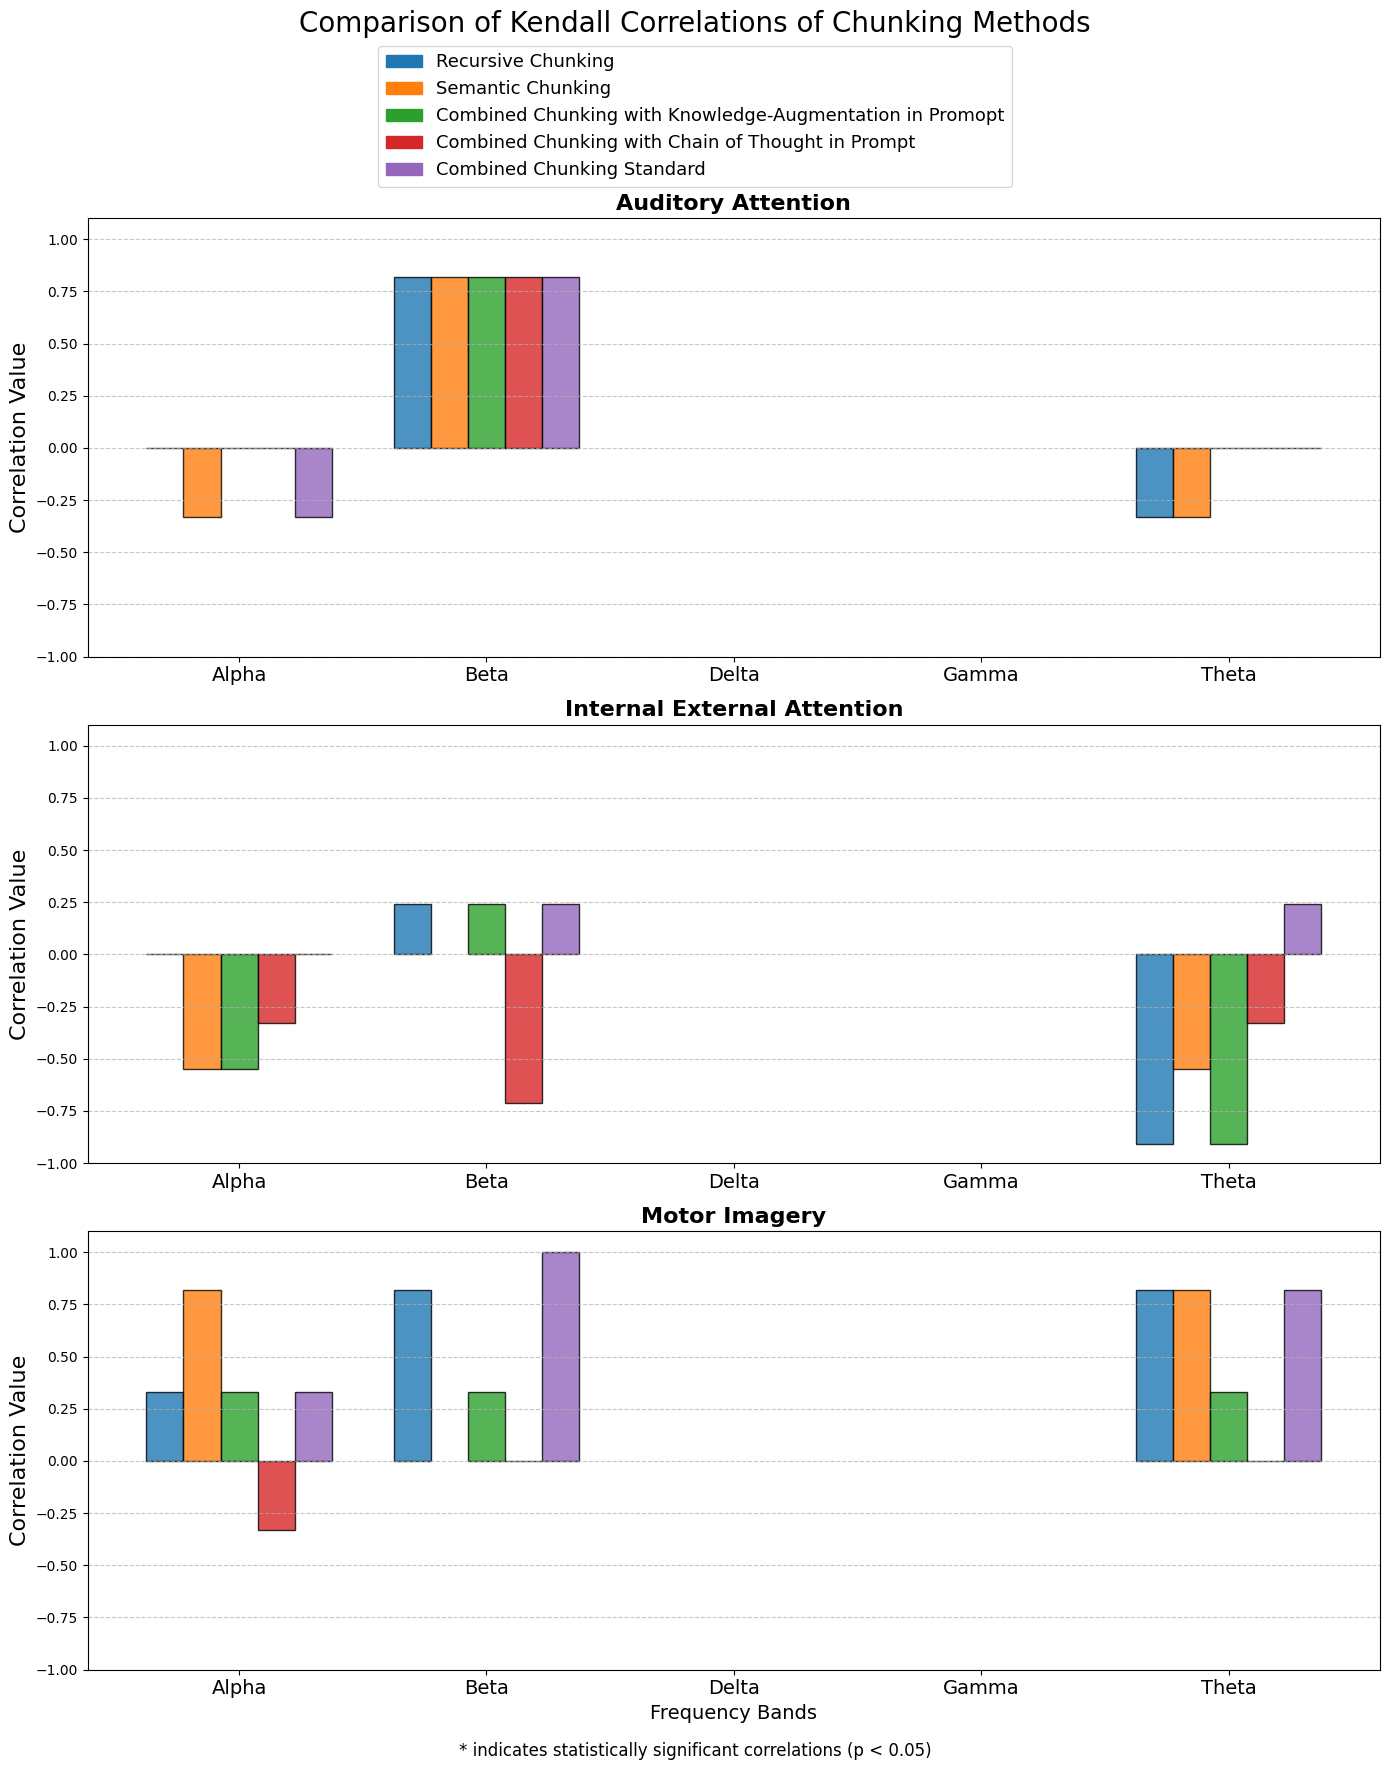

In [102]:
config_labels = ["Recursive Chunking", "Semantic Chunking", "Combined Chunking with Knowledge-Augmentation in Promopt", "Combined Chunking with Chain of Thought in Prompt", "Combined Chunking Standard"]

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=False)
fig.suptitle("Comparison of Kendall Correlations of Chunking Methods", fontsize=20, y=0.99)

# Define the number of configurations and frequency bands
n_configs = len(configurations)
n_bands = len(freq_bands)

# Define bar width and positions
bar_width = 0.15
# Positions of groups on x-axis
indices = np.arange(n_bands)

# To determine global y-axis limits, find the min and max across all data
all_kendall_values = []
for topic in topics:
    for config in configurations:
        for band in freq_bands:
            val = correlations[config][topic]["Kendall"].get(band, np.nan)
            if not np.isnan(val):
                all_kendall_values.append(val)

# Calculate dynamic y-axis limits with a 10% margin
y_min = min(all_kendall_values) - 0.1 * abs(min(all_kendall_values)) if min(all_kendall_values) < 0 else 0
y_max = max(all_kendall_values) + 0.1 * abs(max(all_kendall_values))

for idx, topic in enumerate(topics):
    ax = axes[idx]
    
    # Iterate over configurations to plot each set of bars
    for i, config in enumerate(configurations):
        # Calculate position offset for each configuration
        offset = (i - n_configs / 2) * bar_width + bar_width / 2
        bar_positions = indices + offset
        
        # Extract Kendall correlation values
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        # Extract p-values
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        
        # Plot bars
        bars = ax.bar(bar_positions, kendall_vals, bar_width, label=config_labels[i],
                      color=config_colors[config], alpha=0.8, edgecolor='black')
        
        # Add significance markers
        for j, (bar, p_val) in enumerate(zip(bars, p_kendall_vals)):
            if p_val < significance_threshold:
                height = bar.get_height()
                # Adjust the position of the asterisk based on the bar's height
                if height >= 0:
                    y_position = height
                    va = 'bottom'
                else:
                    y_position = height
                    va = 'top'
                ax.text(bar.get_x() + bar.get_width() / 2, y_position, '*',
                        ha='center', va=va, color='black', fontsize=14, fontweight='bold')
    
    # Set title and labels for each subplot
    ax.set_title(f"{topic}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Correlation Value", fontsize=16)
    ax.set_xticks(indices)
    ax.set_xticklabels(freq_bands, fontsize=14)
    
    # Set dynamic y-axis limits with margin
    ax.set_ylim(y_min, y_max)
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
# Create a single legend for all subplots
handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]
fig.legend(handles, config_labels, loc='upper center', fontsize=13, ncol=1, bbox_to_anchor=(0.5, 0.975))

# Add a note for significance
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=12)

# Set x-axis label on the bottom subplot
axes[-1].set_xlabel("Frequency Bands", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


/var/folders/jh/77msf8k92y97h0j2njj_w7mh0000gn/T/ipykernel_99775/1941324406.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]


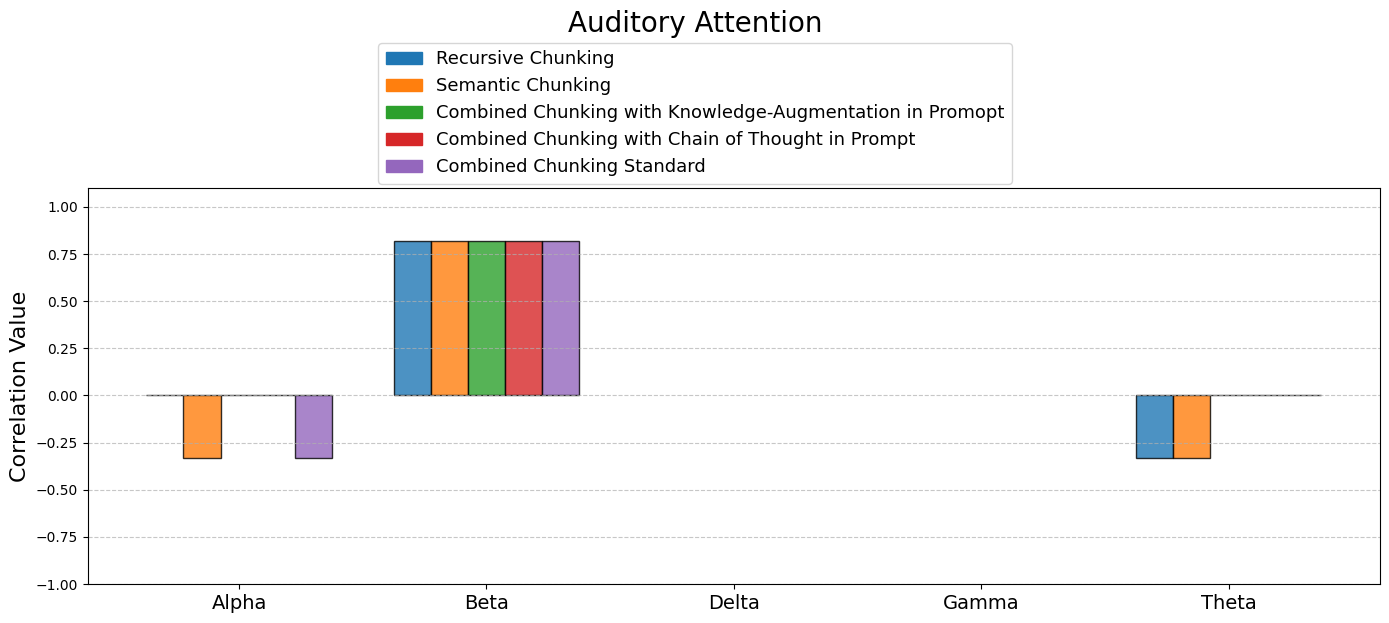

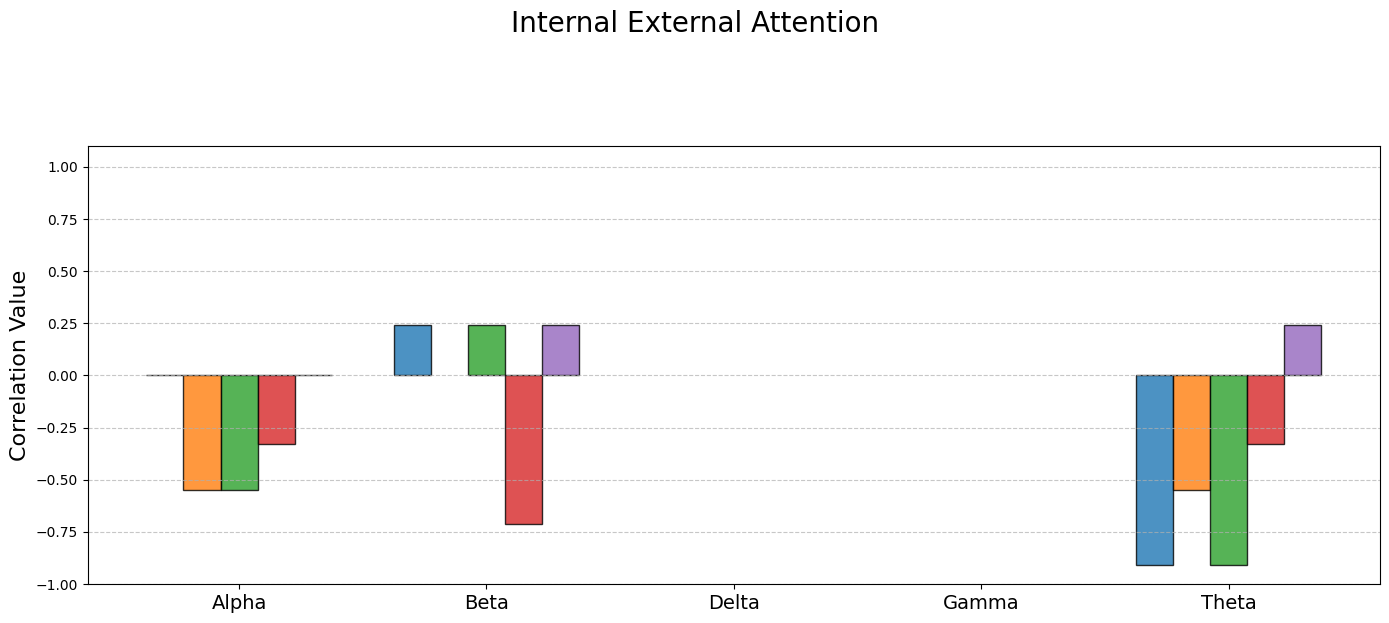

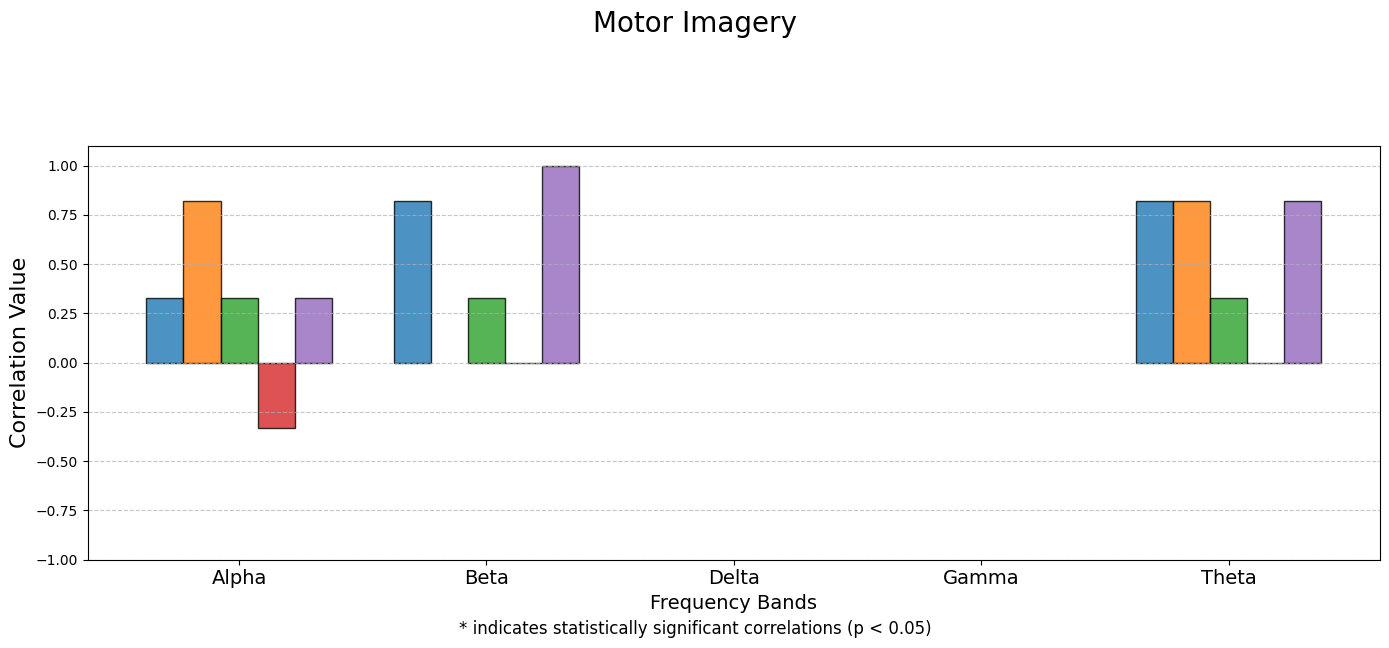

In [104]:
for idx, topic in enumerate(topics):
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle(topic, fontsize=20, y=1.06)
    
    # Iterate over configurations to plot each set of bars
    for i, config in enumerate(configurations):
        # Calculate position offset for each configuration
        offset = (i - n_configs / 2) * bar_width + bar_width / 2
        bar_positions = indices + offset
        
        # Extract Kendall correlation values
        kendall_vals = [correlations[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        # Extract p-values
        p_kendall_vals = [p_values[config][topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        
        # Plot bars
        bars = ax.bar(bar_positions, kendall_vals, bar_width, label=config_labels[i],
                      color=config_colors[config], alpha=0.8, edgecolor='black')
        
        # Add significance markers
        for j, (bar, p_val) in enumerate(zip(bars, p_kendall_vals)):
            if p_val < significance_threshold:
                height = bar.get_height()
                # Adjust the position of the asterisk based on the bar's height
                if height >= 0:
                    y_position = height
                    va = 'bottom'
                else:
                    y_position = height
                    va = 'top'
                ax.text(bar.get_x() + bar.get_width() / 2, y_position, '*',
                        ha='center', va=va, color='black', fontsize=14, fontweight='bold')
    
    # Set title and labels for each subplot
    ax.set_ylabel("Correlation Value", fontsize=16)
    ax.set_xticks(indices)
    ax.set_xticklabels(freq_bands, fontsize=14)
    
    # Set dynamic y-axis limits with margin
    ax.set_ylim(y_min, y_max)
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add legend above the title for the first plot
    if idx == 0:
        handles = [plt.Rectangle((0,0),1,1, color=config_colors[config], edgecolor='black') for config in configurations]
        fig.legend(handles, config_labels, loc='upper center', fontsize=13, ncol=1, bbox_to_anchor=(0.5, 1.02))

    # Add significance note only in the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=12)

    # Add x-axis label for the last plot
    if idx == len(topics) - 1:
        ax.set_xlabel("Frequency Bands", fontsize=14)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


In [105]:
def convert_format(spearman, kendall):
    # Mapping from category keys to their full names
    category_mapping = {
        'AA': 'Auditory Attention',
        'IEA': 'Internal External Attention',
        'MI': 'Motor Imagery'
    }

    # Initialize the target dictionaries
    correlation_results_llm = {}
    p_value_results_llm = {}

    # Iterate through each category and metric to populate the target dictionaries
    for category_key, full_name in category_mapping.items():
        correlation_results_llm[full_name] = {"Spearman": {}, "Kendall": {}}
        p_value_results_llm[full_name] = {"Spearman": {}, "Kendall": {}}
        
        # Process Spearman's results
        for metric, data in spearman[category_key].items():
            rho = data.get('rho', np.nan)
            p_val = data.get('p_value', np.nan)
            
            # Round rho if it's a valid number
            if isinstance(rho, float) and not np.isnan(rho):
                rho_rounded = round(rho, 2)
            else:
                rho_rounded = np.nan
            
            # Round p_value if it's a valid number
            if isinstance(p_val, float) and not np.isnan(p_val):
                p_val_rounded = round(p_val, 2)
            else:
                p_val_rounded = np.nan
            
            correlation_results_llm[full_name]["Spearman"][metric] = rho_rounded
            p_value_results_llm[full_name]["Spearman"][metric] = p_val_rounded
        
        # Process Kendall's results
        for metric, data in kendall[category_key].items():
            tau = data.get('tau', np.nan)
            p_val = data.get('p_value', np.nan)
            
            # Round tau if it's a valid number
            if isinstance(tau, float) and not np.isnan(tau):
                tau_rounded = round(tau, 2)
            else:
                tau_rounded = np.nan
            
            # Round p_value if it's a valid number
            if isinstance(p_val, float) and not np.isnan(p_val):
                p_val_rounded = round(p_val, 2)
            else:
                p_val_rounded = np.nan
            
            correlation_results_llm[full_name]["Kendall"][metric] = tau_rounded
            p_value_results_llm[full_name]["Kendall"][metric] = p_val_rounded

    # Example usage: Print the resulting dictionaries
    print("Correlation Results LLM:")
    print(correlation_results_llm)
    print("\nP-Value Results LLM:")
    print(p_value_results_llm)
    return [correlation_results_llm, p_value_results_llm]

In [106]:
speaman_dif = {'AA': {'Alpha': {'p_value': np.nan, 'rho': np.nan},
        'Beta': {'p_value': 1.0, 'rho': 0.0},
        'Delta': {'p_value': np.nan, 'rho': np.nan},
        'Gamma': {'p_value': np.nan, 'rho': np.nan},
        'Theta': {'p_value': 0.6666666666666667, 'rho': -0.5}},
 'IEA': {'Alpha': {'p_value': 0.7891814893221081, 'rho': -0.21081851067789195},
         'Beta': {'p_value': 0.7418011102528389, 'rho': 0.2581988897471611},
         'Delta': {'p_value': 0.22540333075851657, 'rho': -0.7745966692414834},
         'Gamma': {'p_value': 0.22540333075851657, 'rho': -0.7745966692414834},
         'Theta': {'p_value': 0.367544467966324, 'rho': -0.632455532033676}},
 'MI': {'Alpha': {'p_value': 0.6666666666666667, 'rho': 0.5},
        'Beta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Delta': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Gamma': {'p_value': 0.3333333333333332, 'rho': 0.8660254037844387},
        'Theta': {'p_value': np.nan, 'rho': np.nan}}}

kendall_dif = {'AA': {'Alpha': {'p_value': np.nan, 'tau': np.nan},
        'Beta': {'p_value': 1.0, 'tau': 0.0},
        'Delta': {'p_value': np.nan, 'tau': np.nan},
        'Gamma': {'p_value': np.nan, 'tau': np.nan},
        'Theta': {'p_value': 1.0, 'tau': -0.33333333333333337}},
 'IEA': {'Alpha': {'p_value': 0.7179816667337766, 'tau': -0.18257418583505539},
         'Beta': {'p_value': 0.6547208460185769, 'tau': 0.2357022603955159},
         'Delta': {'p_value': 0.17971249487899976, 'tau': -0.7071067811865477},
         'Gamma': {'p_value': 0.17971249487899976, 'tau': -0.7071067811865477},
         'Theta': {'p_value': 0.2785986718379625, 'tau': -0.5477225575051662}},
 'MI': {'Alpha': {'p_value': 1.0, 'tau': 0.33333333333333337},
        'Beta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Delta': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Gamma': {'p_value': 0.22067136191984693, 'tau': 0.816496580927726},
        'Theta': {'p_value': np.nan, 'tau': np.nan}}}

In [107]:
cor_dif = convert_format(speaman_dif, kendall_dif)[0]
p_dif = convert_format(speaman_dif, kendall_dif)[1]
cor_combined
p_combined

Correlation Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': nan, 'Beta': 0.0, 'Delta': nan, 'Gamma': nan, 'Theta': -0.5}, 'Kendall': {'Alpha': nan, 'Beta': 0.0, 'Delta': nan, 'Gamma': nan, 'Theta': -0.33}}, 'Internal External Attention': {'Spearman': {'Alpha': -0.21, 'Beta': 0.26, 'Delta': -0.77, 'Gamma': -0.77, 'Theta': -0.63}, 'Kendall': {'Alpha': -0.18, 'Beta': 0.24, 'Delta': -0.71, 'Gamma': -0.71, 'Theta': -0.55}}, 'Motor Imagery': {'Spearman': {'Alpha': 0.5, 'Beta': 0.87, 'Delta': 0.87, 'Gamma': 0.87, 'Theta': nan}, 'Kendall': {'Alpha': 0.33, 'Beta': 0.82, 'Delta': 0.82, 'Gamma': 0.82, 'Theta': nan}}}

P-Value Results LLM:
{'Auditory Attention': {'Spearman': {'Alpha': nan, 'Beta': 1.0, 'Delta': nan, 'Gamma': nan, 'Theta': 0.67}, 'Kendall': {'Alpha': nan, 'Beta': 1.0, 'Delta': nan, 'Gamma': nan, 'Theta': 1.0}}, 'Internal External Attention': {'Spearman': {'Alpha': 0.79, 'Beta': 0.74, 'Delta': 0.23, 'Gamma': 0.23, 'Theta': 0.37}, 'Kendall': {'Alpha': 0.72, 'Beta': 0.65, '

{'Auditory Attention': {'Spearman': {'Alpha': 0.67,
   'Beta': 0.33,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 1.0},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.22,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 1.0}},
 'Internal External Attention': {'Spearman': {'Alpha': 1.0,
   'Beta': 0.74,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.74},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.65,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.65}},
 'Motor Imagery': {'Spearman': {'Alpha': 0.67,
   'Beta': 0.0,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.33},
  'Kendall': {'Alpha': 1.0,
   'Beta': 0.33,
   'Delta': nan,
   'Gamma': nan,
   'Theta': 0.22}}}

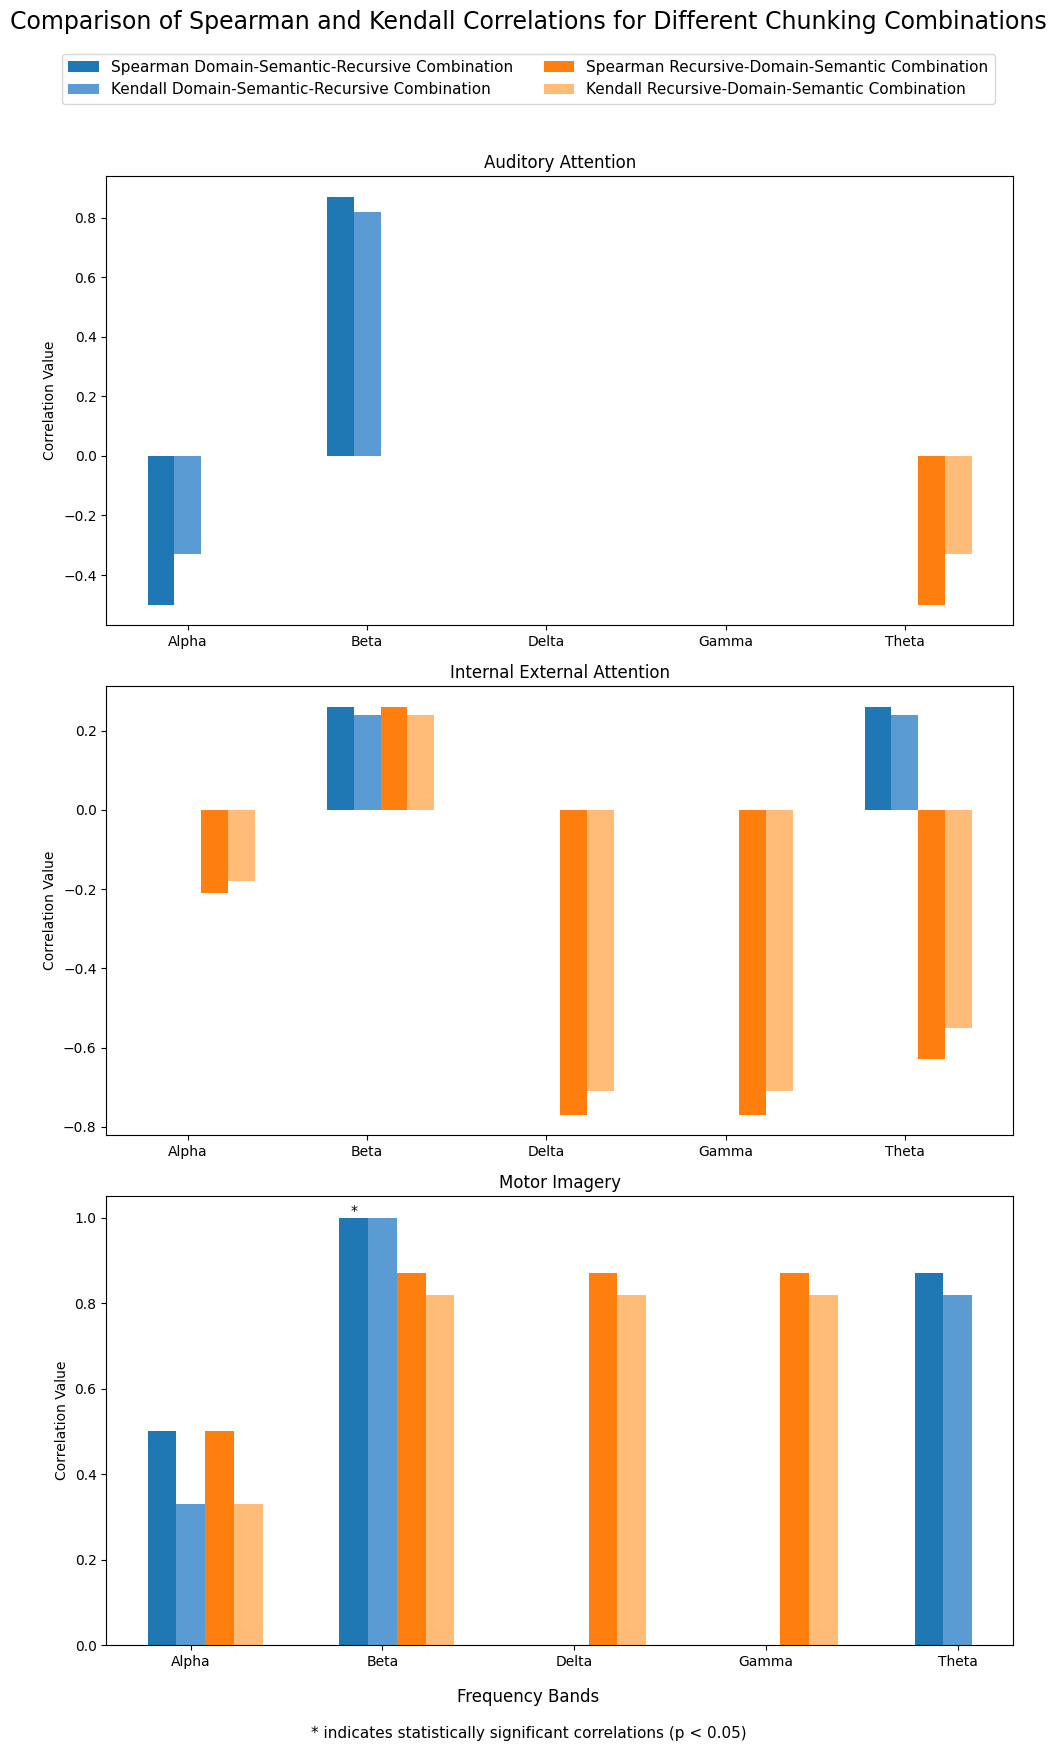

In [108]:
# Define topics and configurations
topics = ["Auditory Attention", "Internal External Attention", "Motor Imagery"]
config_labels = ["Domain-Semantic-Recursive Combination", "Recursive-Domain-Semantic Combination"]
config_data = {
    "Standard": (cor_combined, p_combined),
    "Different": (cor_dif, p_dif)
}

# Define colors: Blue for Low Penalty, Orange for High Penalty, with lighter shades for Kendall
config_colors = {
    "Standard": {"Spearman": "#1f77b4", "Kendall": "#5a9bd4"},  # Blue shades
    "Different": {"Spearman": "#ff7f0e", "Kendall": "#ffbb78"}  # Orange shades
}
significance_threshold = 0.05

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
fig.suptitle("Comparison of Spearman and Kendall Correlations for Different Chunking Combinations", fontsize=17, y=0.98)

# Track bars for legend
legend_handles = []

for idx, topic in enumerate(topics):
    ax = axes[idx]
    freq_bands = list(cor_rep_penalty_low[topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))
    width = 0.3

    # Plot each configuration as a set of bars
    for i, (config_label, (correlations, p_values)) in enumerate(config_data.items()):
        spearman_vals = [correlations[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        kendall_vals = [correlations[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot bars for Spearman and Kendall correlations using the same base color with lighter shade for Kendall
        bars_spearman = ax.bar(x - width/2 + i * width, spearman_vals, width/2,
                               color=config_colors[config_label]["Spearman"], label=f"Spearman {config_label}")
        bars_kendall = ax.bar(x + i * width, kendall_vals, width/2,
                              color=config_colors[config_label]["Kendall"], label=f"Kendall {config_label}")

        # Add bars to legend handles for unique legends
        if idx == 0:  # Add to legend only once
            legend_handles.append(bars_spearman)
            legend_handles.append(bars_kendall)

        # Add significance markers
        for j, (p_spearman, p_kendall) in enumerate(zip(p_spearman_vals, p_kendall_vals)):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width/2 + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')
            if p_kendall < significance_threshold:
                ax.text(x[j] + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set title, x-ticks, and x-tick labels
    ax.set_title(f"{topic}")
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands)
    ax.set_ylabel("Correlation Value")

# Create legend
fig.legend(legend_handles, 
           [f"Spearman Domain-Semantic-Recursive Combination", "Kendall Domain-Semantic-Recursive Combination",
            "Spearman Recursive-Domain-Semantic Combination", "Kendall Recursive-Domain-Semantic Combination"],
           loc="upper center", fontsize=11, ncol=2, bbox_to_anchor=(0.5, 0.96))

# Labels and note for significance
fig.text(0.5, 0.04, "Frequency Bands", ha='center', fontsize=12)
fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


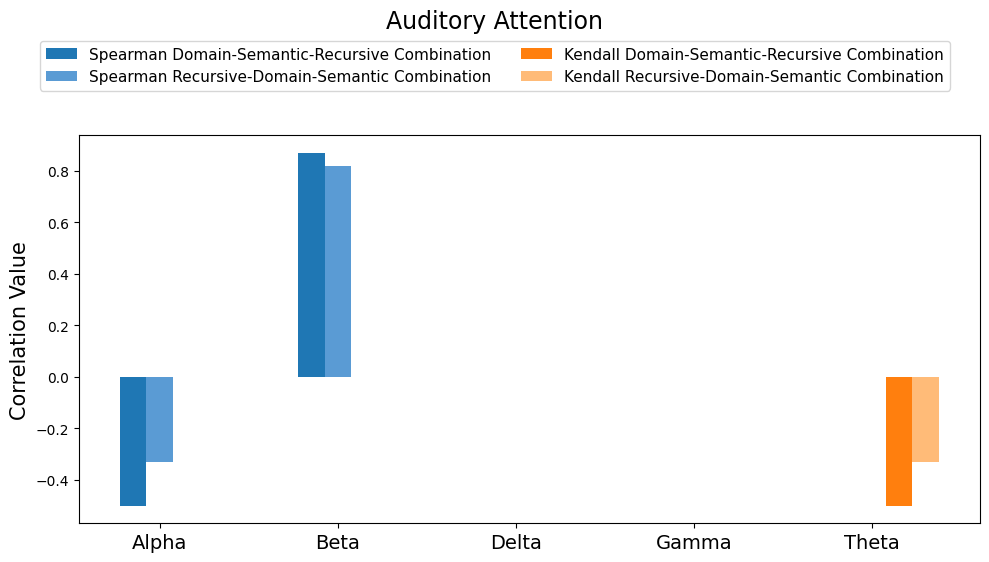

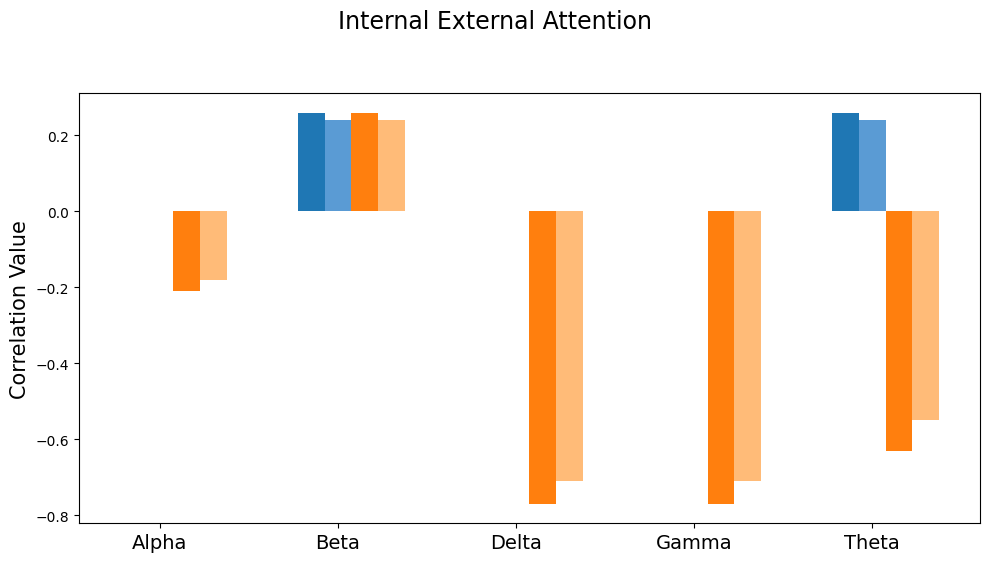

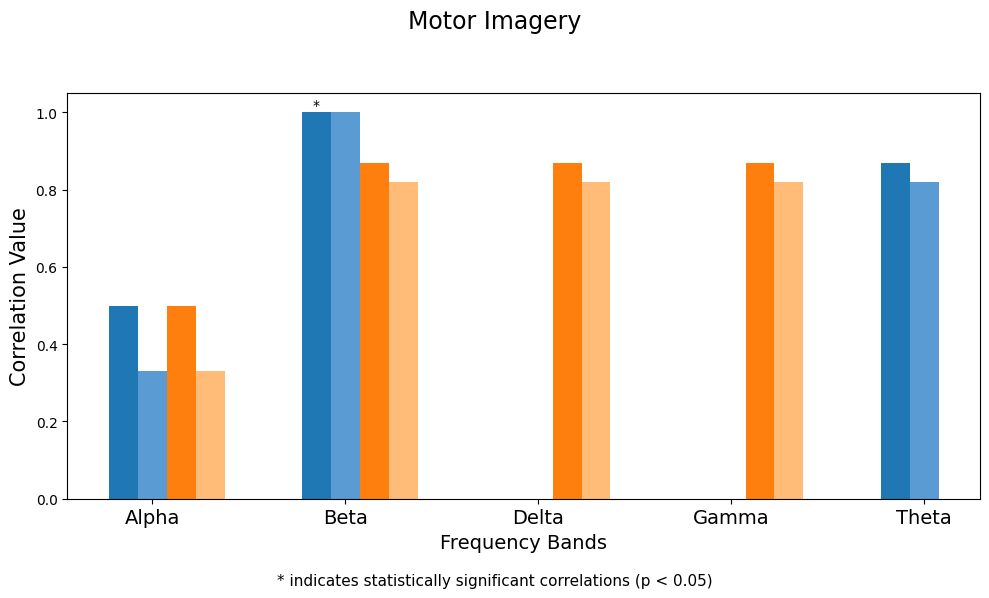

In [110]:
for idx, topic in enumerate(topics):
    freq_bands = list(cor_combined[topic]["Spearman"].keys())
    x = np.arange(len(freq_bands))
    width = 0.3

    # Create a new figure for each topic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(topic, fontsize=17, y=0.98)

    legend_handles = []

    # Plot each configuration as a set of bars
    for i, (config_label, (correlations, p_values)) in enumerate(config_data.items()):
        spearman_vals = [correlations[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        kendall_vals = [correlations[topic]["Kendall"].get(band, np.nan) for band in freq_bands]
        p_spearman_vals = [p_values[topic]["Spearman"].get(band, np.nan) for band in freq_bands]
        p_kendall_vals = [p_values[topic]["Kendall"].get(band, np.nan) for band in freq_bands]

        # Plot bars for Spearman and Kendall correlations
        bars_spearman = ax.bar(x - width/2 + i * width, spearman_vals, width/2,
                               color=config_colors[config_label]["Spearman"], label=f"Spearman {config_label}")
        bars_kendall = ax.bar(x + i * width, kendall_vals, width/2,
                              color=config_colors[config_label]["Kendall"], label=f"Kendall {config_label}")

        # Add bars to legend handles for unique legends
        if idx == 0:  # Add to legend only in the first plot
            legend_handles.append(bars_spearman)
            legend_handles.append(bars_kendall)

        # Add significance markers
        for j, (p_spearman, p_kendall) in enumerate(zip(p_spearman_vals, p_kendall_vals)):
            if p_spearman < significance_threshold:
                ax.text(x[j] - width/2 + i * width, spearman_vals[j], '*', ha='center', va='bottom', color='black')
            if p_kendall < significance_threshold:
                ax.text(x[j] + i * width, kendall_vals[j], '*', ha='center', va='bottom', color='black')

    # Set x-ticks, labels, and title
    ax.set_ylabel("Correlation Value", fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(freq_bands, fontsize=14)

    # Add legend above the title only for the first plot
    if idx == 0:
        fig.legend(legend_handles,
                   [f"Spearman {label}" for label in config_labels] + 
                   [f"Kendall {label}" for label in config_labels],
                   loc="upper center", fontsize=11, ncol=2, bbox_to_anchor=(0.5, 0.94))

    # Add significance note only in the last plot
    if idx == len(topics) - 1:
        fig.text(0.5, 0.02, "* indicates statistically significant correlations (p < 0.05)", ha='center', fontsize=11)

    # Add x-axis label for the last plot
    if idx == len(topics) - 1:
        ax.set_xlabel("Frequency Bands", fontsize=14)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.86 if idx == 0 else 0.93])
    plt.show()


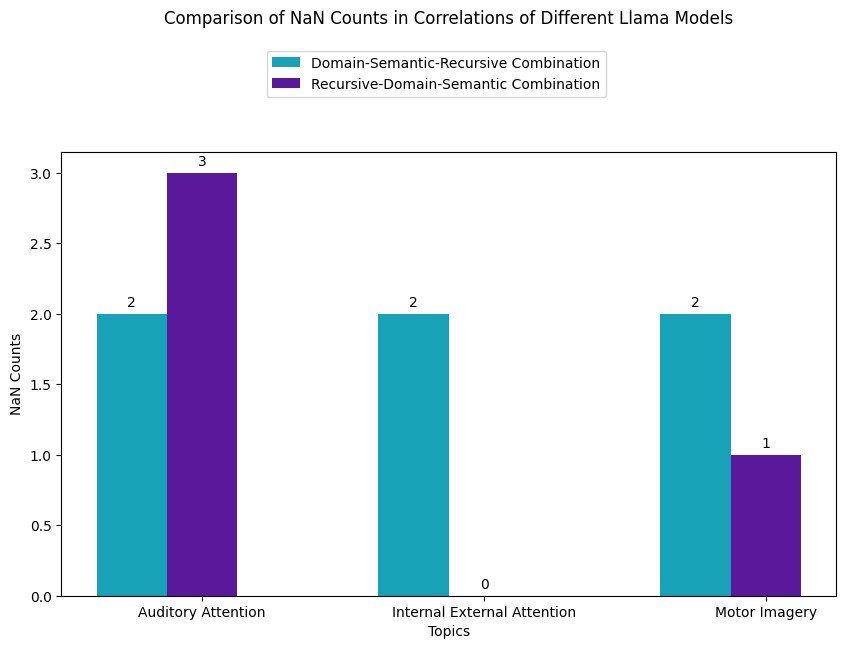

In [109]:
# Calculate NaN counts for each topic
nan_counts = {
    topic: {
        "standard": sum(np.isnan(cor_combined[topic][metric].get(band, np.nan))
                                 for metric in ["Spearman"]
                                 for band in cor_combined[topic][metric]),
        "different": sum(np.isnan(cor_dif[topic][metric].get(band, np.nan))
                               for metric in ["Spearman"]
                               for band in cor_dif[topic][metric])
    }
    for topic in topics
}
config_labels = ["Domain-Semantic-Recursive Combination", "Recursive-Domain-Semantic Combination"]

# Extract topics and NaN counts for plotting
topics_list = list(nan_counts.keys())
nan_standard = [nan_counts[topic]["standard"] for topic in topics_list]
nan_different = [nan_counts[topic]["different"] for topic in topics_list]

# Set up positions for each bar group
x = np.arange(len(topics_list))
width = 0.25  # Reduced width for each bar to fit them all without overlap

fig, ax = plt.subplots(figsize=(10, 6))

# Corrected positions for each set of bars
bars_standard = ax.bar(x - width, nan_standard, width, label="llama3", color="#17a2b8")
bars_different = ax.bar(x, nan_different, width, label="llama3_1", color="#5a189a")

# Add labels and title
ax.set_xlabel("Topics")
ax.set_ylabel("NaN Counts")
ax.set_xticks(x)
ax.set_xticklabels(topics_list)

# Place legend below title with more spacing
fig.legend([f"{label}" for label in config_labels],
           loc="upper center", fontsize=10, ncol=1, bbox_to_anchor=(0.5, 1.03))

# Add the title below the legend by using plt.text
plt.text(0.5, 1.3, "Comparison of NaN Counts in Correlations of Different Llama Models",
         ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Increase space above the plot
plt.subplots_adjust(top=0.85)

# Annotate NaN counts on each bar
for bars in [bars_standard, bars_different]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                    xytext=(0, 3),  # Offset from the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()
